### 6. ¿Hay algún precio de nuestros productos que no siga la tendencia de la competencia ¿Por qué podría ser?

* Al ser tan extensa la cantidad de productos que se venden en un supermercado, tomaremos aquellos ítems correspondientes a las marcas blancas de cada uno. Dentro de los cuales, seleccionaremos tres productos que integren la canasta básica alimentaria. De esa forma estaremos comparando los mismos productos de consumo perecedero durante el mismo periodo.
* Por otra parte, para ver los precios de la competencia, debemos separar el contenido de cada dataset por empresa (Dia, Carrefour y Mercadona). Luego, filtraremos cada dataset de los supermercados para obtener los productos que pertenecen a sus respectivas marcas blancas.
* Debemos hacer un supuesto para el campo fecha ("insert_date"), con el que estaremos trabajando. Tomamos que la fecha se refiere al momento en que el producto es puesto a la venta, por ejemplo en góndola. Así podremos ver el efecto de la remarcación de precios.
* Finalmente, si queremos encontrar una posible tendencia, debemos ver la evolución del precio a través del tiempo. Eso lo podemos visualizar a través de un gráfico de dispersión o en una serie de tiempo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x) # truco para notación cientifica
import requests as rq
import datetime

### Traemos la tabla "RAWDATA"

In [2]:
df_rawdata = pd.read_csv('raw_data.csv')
df_rawdata

,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
0,perfumeria_e_higiene_cuidado_facial_protector_...,LIPOSAN protector labial soft rose envase 1 ud,NaN,2.39,2.39,ud,2021-03-06 00:00:00,45d83ce427cf60c02e1e6f3d28f58ed6,M3
1,perfumeria_e_higiene_higiene_intima_compresas,AUSONIA compresas normal alas bolsa 14 uds,NaN,2.49,0.18,ud,2021-03-06 00:00:00,3fa10738dcbe5f09646eaf39a46a2871,M3
2,perfumeria_e_higiene_higiene_intima_compresas,EVAX Cottonlike compresa super plus con alas b...,NaN,2.79,0.23,ud,2021-03-06 00:00:00,5f5bc0a466375a16d01a6aed6c66e413,M3
3,perfumeria_e_higiene_higiene_bucal_productos_p...,POLIDENT tabletas limpiadoras para prótesis de...,NaN,7.95,0.11,ud,2021-03-06 00:00:00,0a1e56be01f8766d0bb87f3e42fd2abf,M3
4,perfumeria_e_higiene_higiene_bucal_productos_p...,IWHITE kit de blanquamiento dental profesional...,NaN,36.99,3.70,ud,2021-03-06 00:00:00,b150c5e27da5c91d13a5b570c9b3efd3,M3
...,...,...,...,...,...,...,...,...,...
8223987,fruta_y_verdura_verdura,Tomate ensalada,Bandeja,2.09,2.09,kg,2022-09-15 00:00:00,83dca36ff54e06879a2d14d2f4120859,M1
8223988,bebidas_aguas,DIA agua mineral natural botella 50 cl,NaN,0.22,0.44,l,2022-09-15 00:00:00,34d7b9f9d64d3579ed800d5b7f2db8c6,M3
8223989,fruta_y_verdura_verdura,Pepino,Pieza,0.38,1.89,kg,2022-09-15 00:00:00,e390924043f9e289d1db5d60f24a98df,M1
8223990,fruta_y_verdura_fruta,Nectarinas mini,Bandeja,2.19,2.19,kg,2022-09-15 00:00:00,57bff22438b12272070fc553423dc6ee,M1


### Traemos la tabla "Competidores"

In [3]:
df_competidores = pd.read_csv('Super_competitors .csv')
df_competidores

,ID,Name
0,M1,Mercadona
1,M2,Carrefour
2,M3,Dia


### Usamos la función Merge para unir las tablas "competidores" y "rawdata"

In [4]:
## Join de tablas competidores y parte de rawdata
df_data = pd.merge(df_rawdata, df_competidores,how = 'left', left_on = 'id_reference_supermarket', right_on = 'ID')
display(df_data)

,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket,ID,Name
0,perfumeria_e_higiene_cuidado_facial_protector_...,LIPOSAN protector labial soft rose envase 1 ud,NaN,2.39,2.39,ud,2021-03-06 00:00:00,45d83ce427cf60c02e1e6f3d28f58ed6,M3,M3,Dia
1,perfumeria_e_higiene_higiene_intima_compresas,AUSONIA compresas normal alas bolsa 14 uds,NaN,2.49,0.18,ud,2021-03-06 00:00:00,3fa10738dcbe5f09646eaf39a46a2871,M3,M3,Dia
2,perfumeria_e_higiene_higiene_intima_compresas,EVAX Cottonlike compresa super plus con alas b...,NaN,2.79,0.23,ud,2021-03-06 00:00:00,5f5bc0a466375a16d01a6aed6c66e413,M3,M3,Dia
3,perfumeria_e_higiene_higiene_bucal_productos_p...,POLIDENT tabletas limpiadoras para prótesis de...,NaN,7.95,0.11,ud,2021-03-06 00:00:00,0a1e56be01f8766d0bb87f3e42fd2abf,M3,M3,Dia
4,perfumeria_e_higiene_higiene_bucal_productos_p...,IWHITE kit de blanquamiento dental profesional...,NaN,36.99,3.70,ud,2021-03-06 00:00:00,b150c5e27da5c91d13a5b570c9b3efd3,M3,M3,Dia
...,...,...,...,...,...,...,...,...,...,...,...
8223987,fruta_y_verdura_verdura,Tomate ensalada,Bandeja,2.09,2.09,kg,2022-09-15 00:00:00,83dca36ff54e06879a2d14d2f4120859,M1,M1,Mercadona
8223988,bebidas_aguas,DIA agua mineral natural botella 50 cl,NaN,0.22,0.44,l,2022-09-15 00:00:00,34d7b9f9d64d3579ed800d5b7f2db8c6,M3,M3,Dia
8223989,fruta_y_verdura_verdura,Pepino,Pieza,0.38,1.89,kg,2022-09-15 00:00:00,e390924043f9e289d1db5d60f24a98df,M1,M1,Mercadona
8223990,fruta_y_verdura_fruta,Nectarinas mini,Bandeja,2.19,2.19,kg,2022-09-15 00:00:00,57bff22438b12272070fc553423dc6ee,M1,M1,Mercadona


### Creamos la tabla productos

Con el fin de reducir el dataset a la cantidad de columnas necesarias para nuestro análisis.

In [5]:
df_productos = df_data[['Name','category','name','price','insert_date','product_id']]
df_productos

,Name,category,name,price,insert_date,product_id
0,Dia,perfumeria_e_higiene_cuidado_facial_protector_...,LIPOSAN protector labial soft rose envase 1 ud,2.39,2021-03-06 00:00:00,45d83ce427cf60c02e1e6f3d28f58ed6
1,Dia,perfumeria_e_higiene_higiene_intima_compresas,AUSONIA compresas normal alas bolsa 14 uds,2.49,2021-03-06 00:00:00,3fa10738dcbe5f09646eaf39a46a2871
2,Dia,perfumeria_e_higiene_higiene_intima_compresas,EVAX Cottonlike compresa super plus con alas b...,2.79,2021-03-06 00:00:00,5f5bc0a466375a16d01a6aed6c66e413
3,Dia,perfumeria_e_higiene_higiene_bucal_productos_p...,POLIDENT tabletas limpiadoras para prótesis de...,7.95,2021-03-06 00:00:00,0a1e56be01f8766d0bb87f3e42fd2abf
4,Dia,perfumeria_e_higiene_higiene_bucal_productos_p...,IWHITE kit de blanquamiento dental profesional...,36.99,2021-03-06 00:00:00,b150c5e27da5c91d13a5b570c9b3efd3
...,...,...,...,...,...,...
8223987,Mercadona,fruta_y_verdura_verdura,Tomate ensalada,2.09,2022-09-15 00:00:00,83dca36ff54e06879a2d14d2f4120859
8223988,Dia,bebidas_aguas,DIA agua mineral natural botella 50 cl,0.22,2022-09-15 00:00:00,34d7b9f9d64d3579ed800d5b7f2db8c6
8223989,Mercadona,fruta_y_verdura_verdura,Pepino,0.38,2022-09-15 00:00:00,e390924043f9e289d1db5d60f24a98df
8223990,Mercadona,fruta_y_verdura_fruta,Nectarinas mini,2.19,2022-09-15 00:00:00,57bff22438b12272070fc553423dc6ee


In [6]:
df_productos.dtypes

Name            object
category        object
name            object
price          float64
insert_date     object
product_id      object
dtype: object

#### Debemos cambiar el tipo de dato de la columna "insert_date"

La columna que contiene las fechas no es del tipo adecuado, por lo que debemos reconvertirla en un formato adecuado.

In [7]:
df_productos['insert_date'] = pd.to_datetime(df_productos['insert_date'])
df_productos.dtypes
## Esta función no toma las horas, solo fecha

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9268\4231573947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_productos['insert_date'] = pd.to_datetime(df_productos['insert_date'])


Name                   object
category               object
name                   object
price                 float64
insert_date    datetime64[ns]
product_id             object
dtype: object

#### *Es necesario contar con la información separada por supermercado, esto nos permitirá obtener los productos que corresponden a cada marca blanca*

## Supermercados Día

Buscamos filtar aquellos productos pertenecientes al Supermercado Día

In [8]:
solodia = df_productos['Name'] == 'Dia'
dia = df_productos[solodia]
dia.head(10)

,Name,category,name,price,insert_date,product_id
0,Dia,perfumeria_e_higiene_cuidado_facial_protector_...,LIPOSAN protector labial soft rose envase 1 ud,2.39,2021-03-06,45d83ce427cf60c02e1e6f3d28f58ed6
1,Dia,perfumeria_e_higiene_higiene_intima_compresas,AUSONIA compresas normal alas bolsa 14 uds,2.49,2021-03-06,3fa10738dcbe5f09646eaf39a46a2871
2,Dia,perfumeria_e_higiene_higiene_intima_compresas,EVAX Cottonlike compresa super plus con alas b...,2.79,2021-03-06,5f5bc0a466375a16d01a6aed6c66e413
3,Dia,perfumeria_e_higiene_higiene_bucal_productos_p...,POLIDENT tabletas limpiadoras para prótesis de...,7.95,2021-03-06,0a1e56be01f8766d0bb87f3e42fd2abf
4,Dia,perfumeria_e_higiene_higiene_bucal_productos_p...,IWHITE kit de blanquamiento dental profesional...,36.99,2021-03-06,b150c5e27da5c91d13a5b570c9b3efd3
5,Dia,perfumeria_e_higiene_higiene_bucal_productos_p...,BONTE recipiente para ortodoncia 1 ud,3.49,2021-03-06,86dbe0864190dd0241369a8de4472267
6,Dia,perfumeria_e_higiene_higiene_bucal_productos_p...,BONTE tabletas efervesentes limpiadoras para p...,2.35,2021-03-06,d5fb5320c526c22fa5f6498bf7df6b92
7,Dia,perfumeria_e_higiene_higiene_bucal_productos_p...,ALGASIV almohadillas dental superior caja 18 uds,6.99,2021-03-06,6efded61e5bc916a08518e79e68b78bc
8,Dia,perfumeria_e_higiene_higiene_bucal_productos_p...,ALGASIV almohadillas dental inferior caja 18 uds,6.99,2021-03-06,74f8fe0e03043ca0a3d01ba08a7d2613
9,Dia,perfumeria_e_higiene_higiene_bucal_productos_p...,POLIDENT tabletas limpiadoras para prótesis de...,5.99,2021-03-06,fdf7bcae43e35359650ed73af698df4b


Filtramos aquellos productos que se encuentran bajo la marca blanca de Día

In [9]:
blancadia=df_productos[df_productos['name'].str.contains(r'(?:\s|^)DIA(?:\s|$)', na=False)] # Esta aclaración en DIA, nos permite obtener solo los productos de la marca DIA, de lo contrario, podemos obtener productos como finlanDIA.
blancadia.head()

,Name,category,name,price,insert_date,product_id
38,Dia,drogueria_y_limpieza_celulosa_servilletas_de_p...,DIA servilletas blancas 1 capa paquete 200 uds,0.89,2021-03-06,4a8b9fafdc1905275c85f5b602c35ce6
39,Dia,drogueria_y_limpieza_celulosa_servilletas_de_p...,DIA servilletas decoradas 2 capas paquete 100 uds,1.65,2021-03-06,d86d99be6ef14de523ce24e93176ca89
40,Dia,drogueria_y_limpieza_celulosa_servilletas_de_p...,DIA servilletas negras cocktail 2 capas 22x22 ...,1.15,2021-03-06,c0da5ae927d3276bea4ff275fedc5086
41,Dia,drogueria_y_limpieza_celulosa_servilletas_de_p...,DIA servilletas rosadas 2 capas 33x33 cm paque...,1.09,2021-03-06,278ce4de71a9c146875dfe5c91a6fffe
42,Dia,drogueria_y_limpieza_celulosa_servilletas_de_p...,DIA servilletas color 2 capas 33x33 cm paquete...,1.10,2021-03-06,ead1441643f2580f65f022b362662684


### Valores únicos Día

*Buscamos filtrar aquellos valores únicos por categoría*

In [10]:
valores_unicos_dia = blancadia['category'].unique()
valores_unicos_dia

array(['drogueria_y_limpieza_celulosa_servilletas_de_papel',
       'drogueria_y_limpieza_celulosa_papel_higienico_humedo',
       'drogueria_y_limpieza_celulosa_papel_higienico',
       'drogueria_y_limpieza_celulosa_papel_de_cocina',
       'drogueria_y_limpieza_celulosa_panuelos_y_tissues',
       'drogueria_y_limpieza_calzado_limpiacalzado',
       'drogueria_y_limpieza_conservacion_alimentos_papel_horno',
       'drogueria_y_limpieza_conservacion_alimentos_bolsas_de_conservacion',
       'drogueria_y_limpieza_conservacion_alimentos_bolsas_de_congelar',
       'drogueria_y_limpieza_bolsas_basura_y_reutilizable_bolsas_y_sacos_de_basura',
       'drogueria_y_limpieza_ambientadores_para_coche_y_espacios_pequenos',
       'drogueria_y_limpieza_ambientadores_antihumedad',
       'drogueria_y_limpieza_ambientadores_continuos_y_decorativos',
       'drogueria_y_limpieza_ambientadores_aerosol_spray',
       'drogueria_y_limpieza_accesorios_limpieza_plumero',
       'drogueria_y_limpieza_ac

In [11]:
filtro_cat_d = blancadia[blancadia.category.isin
                          (['drogueria_y_limpieza_celulosa_servilletas_de_papel',
       'drogueria_y_limpieza_celulosa_papel_higienico_humedo',
       'drogueria_y_limpieza_celulosa_papel_higienico',
       'drogueria_y_limpieza_celulosa_papel_de_cocina',
       'drogueria_y_limpieza_celulosa_panuelos_y_tissues',
       'drogueria_y_limpieza_calzado_limpiacalzado',
       'drogueria_y_limpieza_conservacion_alimentos_papel_horno',
       'drogueria_y_limpieza_conservacion_alimentos_bolsas_de_conservacion',
       'drogueria_y_limpieza_conservacion_alimentos_bolsas_de_congelar',
       'drogueria_y_limpieza_bolsas_basura_y_reutilizable_bolsas_y_sacos_de_basura',
       'drogueria_y_limpieza_ambientadores_para_coche_y_espacios_pequenos',
       'drogueria_y_limpieza_ambientadores_antihumedad',
       'drogueria_y_limpieza_ambientadores_continuos_y_decorativos',
       'drogueria_y_limpieza_ambientadores_aerosol_spray',
       'drogueria_y_limpieza_accesorios_limpieza_plumero',
       'drogueria_y_limpieza_accesorios_limpieza_pinzas_ropa',
       'drogueria_y_limpieza_accesorios_limpieza_guantes',
       'drogueria_y_limpieza_accesorios_limpieza_fregonas',
       'drogueria_y_limpieza_accesorios_limpieza_estropajos',
       'perfumeria_e_higiene_limpieza_facial_limpieza_desmaquilladores',
       'perfumeria_e_higiene_limpieza_facial_leche_y_tonicos_limpiadores',
       'perfumeria_e_higiene_cuidado_facial_antiarrugas_y_antiedad',
       'perfumeria_e_higiene_botiquin_optica',
       'perfumeria_e_higiene_botiquin_gel_higienizante_y_mascarillas',
       'bebe_higiene_toallitas',
       'desayuno_dulces_y_pan_infusiones_otras_infusiones',
       'desayuno_dulces_y_pan_infusiones_tila',
       'desayuno_dulces_y_pan_infusiones_terapeuticas',
       'desayuno_dulces_y_pan_infusiones_te',
       'desayuno_dulces_y_pan_infusiones_menta_poleo',
       'desayuno_dulces_y_pan_infusiones_manzanilla',
       'desayuno_dulces_y_pan_cafe_capsulas',
       'alimentacion_caldos_sopas_y_pures_caldo_concentrado_y_pastillas',
       'drogueria_y_limpieza_accesorios_limpieza_bayetas_y_gamuzas',
       'drogueria_y_limpieza_limpiadores_para_el_hogar_limpia_muebles',
       'drogueria_y_limpieza_limpiadores_para_el_hogar_limpia_cristales',
       'drogueria_y_limpieza_limpiadores_para_el_hogar_limpia_inodoro_wc',
       'drogueria_y_limpieza_insecticidas_antipolillas_y_carcoma',
       'drogueria_y_limpieza_cuidado_ropa__complementos_aditivos_para_el_lavado',
       'drogueria_y_limpieza_cuidado_ropa__suavizante_concentrado',
       'drogueria_y_limpieza_conservacion_alimentos_papel_aluminio',
       'drogueria_y_limpieza_conservacion_alimentos_film_transparente',
       'mascotas_resto_animales_alimento_peces_tortugas',
       'mascotas_gatos_alimento_humedo',
       'drogueria_y_limpieza_limpiadores_para_el_hogar_lejia',
       'drogueria_y_limpieza_limpiadores_para_el_hogar_limpiador_multiusos',
       'drogueria_y_limpieza_limpiadores_para_el_hogar_quitagrasas',
       'drogueria_y_limpieza_limpiadores_para_el_hogar_antical',
       'drogueria_y_limpieza_lavavajillas_complementos_lavavajillas',
       'drogueria_y_limpieza_lavavajillas_maquina_liquido__polvo',
       'drogueria_y_limpieza_lavavajillas_maquina_pastillas',
       'drogueria_y_limpieza_lavavajillas_a_mano',
       'drogueria_y_limpieza_cuidado_ropa__complementos_quitamanchas',
       'drogueria_y_limpieza_cuidado_ropa__detergente_maquina_liquido',
       'drogueria_y_limpieza_cuidado_ropa__detergente_maquina_tabletas',
       'drogueria_y_limpieza_cuidado_ropa__detergente_maquina_polvo',
       'drogueria_y_limpieza_cuidado_ropa__suavizante_diluido',
       'drogueria_y_limpieza_cuidado_ropa__detergente_a_mano_y_jabon_comun',
       'desayuno_dulces_y_pan_pan_pan_de_molde_integral',
       'desayuno_dulces_y_pan_pan_pan_de_molde_blanco',
       'desayuno_dulces_y_pan_galletas_salud',
       'desayuno_dulces_y_pan_galletas_rellenas',
       'desayuno_dulces_y_pan_galletas_maria',
       'desayuno_dulces_y_pan_galletas_digestive',
       'desayuno_dulces_y_pan_galletas_desayuno_y_merienda_infantil',
       'mascotas_perros_alimento_humedo',
       'congelados_y_helados_platos_precocinados_otros_precocinados',
       'congelados_y_helados_platos_precocinados_empanadillas',
       'congelados_y_helados_platos_precocinados_croquetas',
       'congelados_y_helados_platos_precocinados_base_verdura_y_salteados',
       'congelados_y_helados_platos_precocinados_base_pasta',
       'congelados_y_helados_platos_precocinados_base_carne',
       'congelados_y_helados_platos_precocinados_base_arroz_y_salteados',
       'congelados_y_helados_verdura_y_fruta_otros_vegetales_simples',
       'congelados_y_helados_verdura_y_fruta_condimentos',
       'congelados_y_helados_verdura_y_fruta_patatas',
       'congelados_y_helados_verdura_y_fruta_menestras_y_ensaladillas',
       'congelados_y_helados_verdura_y_fruta_judias_verdes_habas_y_guisantes',
       'congelados_y_helados_verdura_y_fruta_espinacas_y_acelgas',
       'congelados_y_helados_pescado_y_marisco_preparados_paella_y_caldo',
       'congelados_y_helados_pescado_y_marisco_palitos_de_cangrejo_surimi_y_gulas',
       'congelados_y_helados_pescado_y_marisco_marisco',
       'congelados_y_helados_pescado_y_marisco_pescado_preparado',
       'congelados_y_helados_pescado_y_marisco_pescado',
       'congelados_y_helados_pescado_y_marisco_calamar_y_otros_cefalopodos_preparados',
       'congelados_y_helados_pescado_y_marisco_calamar_y_otros_cefalopodos',
       'congelados_y_helados_helados_tartas_y_otros_postres',
       'congelados_y_helados_helados_bloques',
       'congelados_y_helados_helados_tarrinas',
       'congelados_y_helados_helados_sandwich',
       'congelados_y_helados_helados_conos',
       'congelados_y_helados_helados_bombones',
       'lacteos_y_huevos_yogures_petit_e_infantiles',
       'lacteos_y_huevos_yogures_especiales',
       'lacteos_y_huevos_yogures_lcasei',
       'lacteos_y_huevos_yogures_liquidos',
       'lacteos_y_huevos_yogures_bifidus_desnatado',
       'lacteos_y_huevos_yogures_bifidus',
       'lacteos_y_huevos_yogures_yogur_griego',
       'lacteos_y_huevos_yogures_yogur_sabores_desnatado',
       'lacteos_y_huevos_yogures_yogur_sabores',
       'lacteos_y_huevos_yogures_yogur_con_frutas_desnatado',
       'lacteos_y_huevos_yogures_yogur_con_frutas',
       'lacteos_y_huevos_yogures_yogur_natural',
       'lacteos_y_huevos_postres_otros_postres',
       'lacteos_y_huevos_postres_tartas',
       'lacteos_y_huevos_postres_natillas',
       'lacteos_y_huevos_postres_gelatina',
       'lacteos_y_huevos_postres_flan',
       'lacteos_y_huevos_postres_cuajada',
       'lacteos_y_huevos_postres_crema', 'lacteos_y_huevos_postres_copa',
       'lacteos_y_huevos_postres_arroz_con_leche',
       'lacteos_y_huevos_nata_para_montar',
       'lacteos_y_huevos_mantequilla_y_margarina_margarina',
       'lacteos_y_huevos_leche_condensada',
       'lacteos_y_huevos_horchatas_horchatas',
       'desayuno_dulces_y_pan_preparacion_de_postres_siropes_y_caramelos',
       'desayuno_dulces_y_pan_preparacion_de_postres_gelatinas',
       'desayuno_dulces_y_pan_preparacion_de_postres_bizcochos_tartas_y_otros_postres',
       'desayuno_dulces_y_pan_pan_picatostes',
       'desayuno_dulces_y_pan_pan_colines_picos_y_rosquillas',
       'desayuno_dulces_y_pan_pan_pan_aperitivo',
       'desayuno_dulces_y_pan_pan_biscotes_y_pan_tostado',
       'desayuno_dulces_y_pan_pan_barritas_y_panecillos_tostados',
       'desayuno_dulces_y_pan_pan_pan_rallado',
       'desayuno_dulces_y_pan_pan_pan_para_hornear',
       'desayuno_dulces_y_pan_pan_pan_de_molde_para_bocadillos',
       'desayuno_dulces_y_pan_galletas_desayuno',
       'desayuno_dulces_y_pan_galletas_con_chocolate',
       'desayuno_dulces_y_pan_galletas_barquillos',
       'desayuno_dulces_y_pan_caramelos_y_chicles_chicles',
       'desayuno_dulces_y_pan_caramelos_y_chicles_caramelos_duros',
       'desayuno_dulces_y_pan_caramelos_y_chicles_caramelos_blandos_y_golosinas',
       'desayuno_dulces_y_pan_chocolates_y_bombones_grajeas_y_huevos_chocolate',
       'desayuno_dulces_y_pan_chocolates_y_bombones_chocolatinas',
       'desayuno_dulces_y_pan_chocolates_y_bombones_tabletas',
       'desayuno_dulces_y_pan_cereales_cereales_infantiles',
       'desayuno_dulces_y_pan_cereales_cereales_linea_fibra_muesli',
       'desayuno_dulces_y_pan_cereales_cereales_familiar',
       'desayuno_dulces_y_pan_cereales_barritas_cereales',
       'desayuno_dulces_y_pan_cafe_cereales_solubles_y_achicoria',
       'desayuno_dulces_y_pan_cafe_capuchino_y_otros',
       'desayuno_dulces_y_pan_cafe_soluble_natural',
       'desayuno_dulces_y_pan_cafe_soluble_descafeinado',
       'desayuno_dulces_y_pan_cafe_molido_mezcla',
       'desayuno_dulces_y_pan_cafe_molido_descafeinado',
       'desayuno_dulces_y_pan_cafe_en_grano',
       'desayuno_dulces_y_pan_cacao_cremas_de_cacao',
       'desayuno_dulces_y_pan_cacao_cacao_soluble__instantaneo',
       'desayuno_dulces_y_pan_bolleria_otros_productos',
       'desayuno_dulces_y_pan_bolleria_tartas_y_bizcochos',
       'desayuno_dulces_y_pan_bolleria_productos_regionales_y_de_campana',
       'desayuno_dulces_y_pan_bolleria_pastelitos_y_donuts',
       'desayuno_dulces_y_pan_bolleria_pan_de_leche_y_brioches',
       'desayuno_dulces_y_pan_bolleria_croissants_ensaimadas_y_napolitanas',
       'desayuno_dulces_y_pan_bolleria_bizcochos_y_magdalenas',
       'desayuno_dulces_y_pan_azucar_y_edulcorantes_edulcorantes',
       'desayuno_dulces_y_pan_azucar_y_edulcorantes_azucar',
       'alimentacion_dieteticos_tortitas',
       'alimentacion_dieteticos_control_de_peso',
       'alimentacion_salsas_otras_salsas',
       'alimentacion_salsas_tomate_frito',
       'alimentacion_salsas_para_pastas', 'alimentacion_salsas_ketchup',
       'alimentacion_salsas_brava_barbacoa_y_rosa',
       'alimentacion_sal_especias_y_sazonadores_especias',
       'alimentacion_sal_especias_y_sazonadores_sazonadores',
       'alimentacion_sal_especias_y_sazonadores_sal',
       'alimentacion_conservas_de_carne_conservas_de_carne',
       'alimentacion_pizza_bases_y_masas_bases_y_masas_refrigeradas',
       'alimentacion_pizza_bases_y_masas_bases_y_masas_congeladas',
       'alimentacion_pizza_bases_y_masas_pizza_congelada',
       'alimentacion_patatas_fritas_aperitivos_y_frutos_secos_frutos_secos',
       'alimentacion_patatas_fritas_aperitivos_y_frutos_secos_patatas_fritas',
       'alimentacion_patatas_fritas_aperitivos_y_frutos_secos_aperitivos',
       'alimentacion_patatas_fritas_aperitivos_y_frutos_secos_galletas_saladas',
       'alimentacion_pastas_pasta_fresca',
       'alimentacion_pastas_macarrones_y_pasta_corta',
       'platos_preparados_pizza_refrigerada_pizza_refrigerada',
       'frescos_pescado_y_marisco_pescado_fresco_azul',
       'frescos_verdura_y_hortalizas_acelgas_y_espinacas',
       'frescos_verdura_y_hortalizas_preparadas_y_cocinadas',
       'frescos_verdura_y_hortalizas_ensaladas_para_consumir',
       'charcuteria_y_quesos_charcuteria_y_quesos_al_corte_queso_al_corte',
       'alimentacion_arroz_vaporizado',
       'charcuteria_y_quesos_cocido_bacon_y_panceta',
       'charcuteria_y_quesos_cocido_fiambres_ave',
       'charcuteria_y_quesos_curado_chorizo',
       'charcuteria_y_quesos_cocido_jamon_cocido__york',
       'alimentacion_salsas_mostaza',
       'charcuteria_y_quesos_cocido_mortadela_y_chopped',
       'charcuteria_y_quesos_curado_jamon',
       'charcuteria_y_quesos_curado_lomo',
       'charcuteria_y_quesos_curado_salchichon_y_salami',
       'charcuteria_y_quesos_curado_fuet_y_longaniza',
       'charcuteria_y_quesos_curado_surtido_de_embutidos',
       'charcuteria_y_quesos_quesos_curados',
       'charcuteria_y_quesos_quesos_semicurados',
       'charcuteria_y_quesos_quesos_tiernos_y_light',
       'charcuteria_y_quesos_quesos_cabra',
       'charcuteria_y_quesos_quesos_oveja',
       'charcuteria_y_quesos_quesos_azul_y_roquefort',
       'charcuteria_y_quesos_quesos_bola_edam_gouda_maasdam',
       'charcuteria_y_quesos_quesos_emmental_y_gruyere',
       'charcuteria_y_quesos_quesos_frescos_y_para_ensaladas',
       'charcuteria_y_quesos_quesos_fundidos',
       'charcuteria_y_quesos_quesos_para_untar',
       'charcuteria_y_quesos_quesos_tablas',
       'charcuteria_y_quesos_quesos_otros_importacion',
       'charcuteria_y_quesos_pates_foie_y_untables_pates',
       'charcuteria_y_quesos_pates_foie_y_untables_foie',
       'charcuteria_y_quesos_salchichas_salchichas',
       'alimentacion_aceitunas_y_encurtidos_aceitunas_verdes',
       'alimentacion_arroz_cocido',
       'alimentacion_aceitunas_y_encurtidos_aceitunas_negras',
       'alimentacion_aceitunas_y_encurtidos_aceitunas_rellenas',
       'alimentacion_aceitunas_y_encurtidos_encurtidos',
       'alimentacion_arroz_redondo', 'alimentacion_arroz_largo',
       'alimentacion_arroz_especial_integral_y_semolas',
       'alimentacion_caldos_sopas_y_pures_sopas_en_sobre',
       'alimentacion_caldos_sopas_y_pures_cremas_en_sobre',
       'alimentacion_caldos_sopas_y_pures_pure_de_patata',
       'alimentacion_conservas_dulces_y_mermeladas_frutas_en_almibar_y_en_su_jugo',
       'alimentacion_conservas_dulces_y_mermeladas_compotas',
       'alimentacion_conservas_pescado_ensaladas',
       'alimentacion_conservas_pescado_almejas',
       'alimentacion_conservas_pescado_anchoas',
       'alimentacion_conservas_pescado_atun_bonito_y_ventresca',
       'alimentacion_conservas_pescado_caballa',
       'alimentacion_conservas_pescado_calamares_chipirones_y_pulpo',
       'alimentacion_conservas_pescado_mejillones',
       'alimentacion_conservas_pescado_sardinas_y_sardinillas',
       'alimentacion_conservas_pescado_otras_conservas',
       'alimentacion_conservas_vegetales_tomate',
       'alimentacion_conservas_vegetales_alcachofa',
       'alimentacion_conservas_vegetales_esparrago',
       'alimentacion_conservas_vegetales_guisante',
       'alimentacion_conservas_vegetales_judia_verde',
       'alimentacion_conservas_vegetales_macedonias_y_menestras',
       'alimentacion_conservas_vegetales_pimiento',
       'alimentacion_conservas_vegetales_setas_y_champinones',
       'alimentacion_legumbres_legumbres_preparadas',
       'alimentacion_conservas_vegetales_vegetales_ensalada',
       'alimentacion_conservas_vegetales_otros_vegetales',
       'alimentacion_harinas_harinas', 'alimentacion_legumbres_alubias',
       'alimentacion_legumbres_garbanzos',
       'alimentacion_legumbres_lentejas',
       'alimentacion_legumbres_alubias_cocidas',
       'alimentacion_legumbres_garbanzos_cocidos',
       'alimentacion_legumbres_lentejas_cocidas',
       'alimentacion_pastas_pasta_semi_preparada',
       'alimentacion_pastas_espaguetis_y_tallarines',
       'alimentacion_pastas_fideos_y_para_sopa',
       'mascotas_resto_animales_alimento_pajaros',
       'perfumeria_e_higiene_cuidado_facial_hidratantes_y_nutritivas',
       'perfumeria_e_higiene_cuidado_corporal_protector_solar',
       'perfumeria_e_higiene_cuidado_corporal_cremas_cuerpo__body_milk',
       'bebidas_sidra_sidra', 'bebidas_vinos_blancos_rioja',
       'bebidas_sangrias_y_combinados_base_vino_sangrias_y_combinados_base_vino',
       'bebidas_alcoholes_y_licores_licor',
       'bebidas_alcoholes_y_licores_ginebra',
       'bebidas_alcoholes_y_licores_brandy_y_cognac',
       'bebidas_cervezas_sin_alcohol_y_light',
       'alimentacion_aceite_aceite_de_oliva_suave_05o',
       'alimentacion_aceite_aceite_de_oliva_intenso_06o1o',
       'alimentacion_aceite_aceite_de_oliva_virgen_y_virgen_extra',
       'alimentacion_caldos_sopas_y_pures_caldos_y_sopas_en_brick',
       'bebidas_refrescos_limon', 'alimentacion_salsas_mayonesa',
       'alimentacion_vinagre_y_alinos_vinagre',
       'alimentacion_vinagre_y_alinos_aderezo_limon',
       'lacteos_y_huevos_batidos_fresa',
       'lacteos_y_huevos_leche_desnatada',
       'lacteos_y_huevos_leche_semidesnatada',
       'lacteos_y_huevos_leche_calcio',
       'lacteos_y_huevos_leche_sin_lactosa',
       'lacteos_y_huevos_leche_leches_especiales',
       'bebidas_aguas_agua_sin_gas', 'bebidas_refrescos_cola',
       'bebidas_refrescos_naranja', 'bebidas_refrescos_limalimon',
       'bebidas_refrescos_sabores', 'bebidas_refrescos_bitter',
       'bebidas_refrescos_te', 'bebidas_refrescos_tonica_y_ginger_ale',
       'bebidas_refrescos_bebidas_de_frutas',
       'bebidas_refrescos_refrigerados',
       'bebidas_gaseosas_y_sodas_gaseosas_y_sodas',
       'bebidas_isotonicas_y_energeticas_isotonicas',
       'bebidas_isotonicas_y_energeticas_energeticas',
       'bebidas_zumos_y_nectares_zumo', 'bebidas_zumos_y_nectares_nectar',
       'bebidas_zumos_y_nectares_refrigerados',
       'bebidas_cervezas_estandar', 'bebidas_cervezas_premium',
       'bebidas_cervezas_especialidades',
       'bebidas_cervezas_con_limon_y_otros_sabores',
       'drogueria_y_limpieza_limpiadores_para_el_hogar_amoniaco_desinfectantes_agua_destilada',
       'drogueria_y_limpieza_limpiadores_para_el_hogar_fregasuelos',
       'drogueria_y_limpieza_limpiadores_para_el_hogar_abrillantador_suelos',
       'drogueria_y_limpieza_limpiadores_para_el_hogar_desatascador_limpia_tuberias',
       'drogueria_y_limpieza_limpiadores_para_el_hogar_limpia_vitroceramica',
       'drogueria_y_limpieza_limpiadores_para_el_hogar_limpia_banos',
       'drogueria_y_limpieza_cuidado_ropa__complementos_lejia_para_ropa',
       'perfumeria_e_higiene_cuidado_facial_contorno_de_ojos',
       'charcuteria_y_quesos_quesos_rallados',
       'alimentacion_aceite_aceite_de_girasol',
       'alimentacion_aceite_otros_aceites',
       'alimentacion_caldos_sopas_y_pures_cremas_en_brick',
       'alimentacion_salsas_bechamel', 'alimentacion_salsas_all_i_oli',
       'alimentacion_salsas_soja',
       'alimentacion_dieteticos_complementos_nutricionales',
       'desayuno_dulces_y_pan_cafe_molido_natural',
       'desayuno_dulces_y_pan_galletas_surtidas_y_pastas_de_te',
       'desayuno_dulces_y_pan_pan_pan_fresco',
       'lacteos_y_huevos_batidos_cacao',
       'lacteos_y_huevos_batidos_vainilla',
       'lacteos_y_huevos_leche_entera',
       'lacteos_y_huevos_leche_en_polvo_y_deshidratada',
       'lacteos_y_huevos_nata_para_cocinar',
       'congelados_y_helados_helados_polos', 'bebidas_aguas_agua_con_gas',
       'drogueria_y_limpieza_bolsas_basura_y_reutilizable_bolsas_reutilizables',
       'drogueria_y_limpieza_cuidado_ropa__detergente_prendas_delicadas',
       'lacteos_y_huevos_yogures_yogur_natural_desnatado',
       'lacteos_y_huevos_yogures_soja',
       'drogueria_y_limpieza_insecticidas_repelentes',
       'mascotas_resto_animales_alimento_roedores',
       'mascotas_gatos_arena_higiene',
       'alimentacion_conservas_pescado_berberechos',
       'charcuteria_y_quesos_quesos_barra', 'bebe_panales_junior_13_kg',
       'perfumeria_e_higiene_botiquin_bicarbonato',
       'frescos_pescado_y_marisco_surimi_gulas_y_derivados',
       'frescos_pescado_y_marisco_ahumados_salazones_y_marinados',
       'bebe_higiene_puericultura',
       'frescos_pescado_y_marisco_pescado_fresco_blanco',
       'frescos_pescado_y_marisco_marisco_fresco',
       'bebe_panales_grandes_915_kg',
       'drogueria_y_limpieza_insecticidas_electricos',
       'despensa_desayunos_y_dulces_infusiones',
       'despensa_conservas_y_sopas_caldos',
       'despensa_desayunos_y_dulces_cafe',
       'despensa_lacteos_y_huevos_leche',
       'despensa_lacteos_y_huevos_bebidas_vegetales',
       'despensa_lacteos_y_huevos_nata',
       'despensa_conservas_y_sopas_cremas',
       'despensa_aceites_vinagres_y_alinos_aceites',
       'despensa_salsas_mayonesa_y_otras_salsas',
       'bebidas_cervezas_nacionales', 'bebidas_cervezas_especiales',
       'bebidas_cervezas_con_limon', 'bebidas_cervezas_sin_alcohol',
       'bodega_alcoholes_brandy', 'bodega_alcoholes_ginebra',
       'bodega_licores_otros_licores', 'bodega_vino_blanco',
       'cuidado_del_hogar_productos_de_limpieza_hogar',
       'cuidado_personal_cuidado_corporal_hidratacion_corporal',
       'cuidado_personal_cuidado_corporal_limpieza_facial',
       'cuidado_personal_cuidado_corporal_crema_facial',
       'cuidado_del_hogar_productos_de_limpieza_bano',
       'cuidado_del_hogar_productos_de_limpieza_cocina',
       'despensa_arroz_y_legumbres_legumbres',
       'despensa_aceites_vinagres_y_alinos_vinagres_y_alinos',
       'despensa_pan_pan_de_molde',
       'despensa_cocina_internacional_mejicana',
       'despensa_cocina_internacional_oriental',
       'despensa_dieteticos_perdida_de_peso',
       'despensa_lacteos_y_huevos_postres',
       'al_dia_charcuteria_y_quesos_curados',
       'al_dia_charcuteria_y_quesos_quesos',
       'al_dia_pescado_y_marisco_ahumados_y_salazones',
       'al_dia_verduras_y_hortalizas_verduras_y_ensaladas_preparadas',
       'al_dia_verduras_y_hortalizas_otras_verduras',
       'despensa_lacteos_y_huevos_yogures',
       'al_dia_charcuteria_y_quesos_cocidos',
       'despensa_desayunos_y_dulces_chocolates_y_bombones',
       'despensa_desayunos_y_dulces_cacao_y_cremas_de_cacao',
       'despensa_desayunos_y_dulces_preparacion_de_postres',
       'despensa_conservas_y_sopas_conservas_vegetales',
       'despensa_conservas_y_sopas_conservas_de_pescado',
       'despensa_conservas_y_sopas_conservas_de_carne',
       'despensa_pastas_harinas_y_masas_pastas',
       'despensa_conservas_y_sopas_sopas',
       'despensa_arroz_y_legumbres_arroz',
       'despensa_conservas_y_sopas_pures',
       'despensa_pastas_harinas_y_masas_masas_y_hojaldres',
       'despensa_pastas_harinas_y_masas_harinas_y_levaduras',
       'despensa_salsas_tomate', 'despensa_pan_biscotes',
       'despensa_pan_pan_de_hamburguesas_y_perritos',
       'despensa_pan_pan_de_horno', 'despensa_pan_picos_de_pan',
       'despensa_pan_pan_rallado', 'despensa_pan_snack_de_pan',
       'despensa_dieteticos_semillas',
       'despensa_lacteos_y_huevos_mantequilla_y_margarina',
       'despensa_desayunos_y_dulces_galletas',
       'despensa_desayunos_y_dulces_cereales',
       'despensa_desayunos_y_dulces_bolleria',
       'despensa_desayunos_y_dulces_mermeladas_miel_y_frutas_en_almibar',
       'despensa_desayunos_y_dulces_azucar_y_edulcorantes',
       'despensa_desayunos_y_dulces_caramelos_chicles_y_golosinas',
       'al_dia_verduras_y_hortalizas_espinacas_y_alcachofas',
       'cuidado_del_hogar_cuidado_de_la_ropa', 'cuidado_del_hogar_papel',
       'cuidado_del_hogar_ambientadores', 'cuidado_del_hogar_calzado',
       'cuidado_del_hogar_insecticidas',
       'cuidado_del_hogar_conservacion_de_alimentos',
       'cuidado_del_hogar_utensilios_de_limpieza',
       'platos_preparados_nuestra_cocina_al_dia',
       'cuidado_personal_botiquin', 'bebe_panales', 'despensa_aperitivos',
       'despensa_sal_y_especias', 'despensa_pates_y_foies',
       'bebidas_batidos_y_horchata', 'congelados_precocinados',
       'congelados_pizzas_bases_y_masas', 'congelados_pescado_y_marisco',
       'congelados_verduras_y_hortalizas', 'congelados_helados',
       'mascotas_perros', 'mascotas_gatos', 'mascotas_otros_animales',
       'platos_preparados_pizzas_refrigeradas',
       'platos_preparados_tortillas', 'platos_preparados_carne',
       'platos_preparados_verduras', 'platos_preparados_pastas_y_arroces',
       'platos_preparados_empanadas_empanadillas_y_hojaldres',
       'platos_preparados_bocadillos_y_sandwich',
       'platos_preparados_croquetas_y_aperitivos',
       'al_dia_pescado_y_marisco_gulas_y_surimi',
       'platos_preparados_gazpachos_y_salmorejos', 'bebidas_refrescos',
       'bebidas_aguas', 'bebidas_zumos',
       'bebidas_bebidas_isotonicas_y_energeticas', 'bodega_espumosos',
       'bodega_vinos_de_mesa_sangrias_y_tintos_de_verano',
       'al_dia_carne_cerdo', 'cuidado_del_hogar_lavavajillas',
       'bebe_toallitas', 'al_dia_carne_pollo', 'al_dia_carne_pavo',
       'bebe_cuidado_del_bebe', 'al_dia_pescado_y_marisco_pescado_fresco',
       'al_dia_pescado_y_marisco_marisco', 'despensa_sopas_caldos',
       'despensa_conservas_conservas_de_pescado',
       'despensa_conservas_conservas_vegetales',
       'despensa_conservas_conservas_de_carne', 'despensa_sopas_sopas',
       'despensa_sopas_cremas_y_pures', 'al_dia_carne_mixto',
       'al_dia_carne_vacuno', 'platos_preparados_pescado',
       'platos_preparados_ensaladas',
       'al_dia_pescado_y_marisco_pescado_y_marisco_fresco',
       'cuidado_personal_bano_e_higiene_personal_champus',
       'bodega_vino_tinto', 'bodega_licores_sin_alcohol',
       'despensa_sopas_cremas', 'frescos_carne_pavo',
       'frescos_carne_vacuno', 'frescos_charcuteria_y_quesos_curados',
       'frescos_pescado_y_marisco_gulas_y_surimi',
       'frescos_verduras_y_hortalizas_otras_verduras',
       'frescos_verduras_y_hortalizas_verduras_y_ensaladas_preparadas',
       'frescos_verduras_y_hortalizas_espinacas_y_alcachofas',
       'frescos_pescado_y_marisco_ahumados_y_salazones',
       'frescos_pescado_y_marisco_pescado_y_marisco_fresco',
       'frescos_charcuteria_y_quesos_quesos',
       'frescos_charcuteria_y_quesos_cocidos', 'frescos_carne_mixto',
       'frescos_carne_cerdo', 'frescos_carne_pollo',
       'dulces_de_navidad_turrones',
       'dulces_de_navidad_mantecados_y_polvorones',
       'dulces_de_navidad_surtidos_navidenos',
       'dulces_de_navidad_mazapanes', 'dulces_de_navidad_panettones',
       'despensa_pan_crackers_y_tartaletas',
       'dulces_de_navidad_roscones_de_reyes',
       'cuidado_personal_bano_e_higiene_personal_jabon',
       'cuidado_del_hogar_bazar',
       'dulces_de_navidad_calendario_de_adviento',
       'frescos_carne_otras_aves', 'bodega_alcoholes_vodka',
       'frescos_carne_cordero', 'platos_preparados_legumbres',
       'cuidado_personal_cuidado_corporal_cuidado_de_manos_y_pies',
       'congelados_carne_y_pollo',
       'cuidado_personal_cuidado_corporal_crema_solar',
       'cuidado_personal_bano_e_higiene_personal_desodorantes',
       'cuidado_personal_bano_e_higiene_personal_geles_de_duchas_y_esponjas',
       'frescos_verduras_y_hortalizas_judias_y_guisantes',
       'cuidado_personal_cuidado_bucal', 'congelados_hielo',
       'frescos_carne_conejo',])]
filtro_cat_d

,Name,category,name,price,insert_date,product_id
38,Dia,drogueria_y_limpieza_celulosa_servilletas_de_p...,DIA servilletas blancas 1 capa paquete 200 uds,0.89,2021-03-06,4a8b9fafdc1905275c85f5b602c35ce6
39,Dia,drogueria_y_limpieza_celulosa_servilletas_de_p...,DIA servilletas decoradas 2 capas paquete 100 uds,1.65,2021-03-06,d86d99be6ef14de523ce24e93176ca89
40,Dia,drogueria_y_limpieza_celulosa_servilletas_de_p...,DIA servilletas negras cocktail 2 capas 22x22 ...,1.15,2021-03-06,c0da5ae927d3276bea4ff275fedc5086
41,Dia,drogueria_y_limpieza_celulosa_servilletas_de_p...,DIA servilletas rosadas 2 capas 33x33 cm paque...,1.09,2021-03-06,278ce4de71a9c146875dfe5c91a6fffe
42,Dia,drogueria_y_limpieza_celulosa_servilletas_de_p...,DIA servilletas color 2 capas 33x33 cm paquete...,1.10,2021-03-06,ead1441643f2580f65f022b362662684
...,...,...,...,...,...,...
8223779,Dia,congelados_pizzas_bases_y_masas,DIA pizza campestre caja 400 gr,1.99,2022-09-15,6dfbf932ec850e92338c929dc7b936af
8223781,Dia,congelados_pizzas_bases_y_masas,DIA mini pizzas jamón y queso caja 270 gr,2.05,2022-09-15,b0a8232eef7b77a8eabea397e1e27e68
8223871,Dia,cuidado_personal_bano_e_higiene_personal_desod...,DIA IMAQE desodorante con extracto de rosa mos...,0.75,2022-09-15,1a3192873d61a6cc441cfabb488872bf
8223872,Dia,cuidado_personal_bano_e_higiene_personal_desod...,DIA IMAQE desodorante para pieles atópicas rol...,0.75,2022-09-15,458ce35de717f4123ccbbdb5d98a1ec4


### CBA Día (Canasta Básica Alimentaria - Arroz, Pollo y Café)

*Analizamos los precios de tres productos pertenecientes a la Canasta Básica Alimentaria: **Arroz, Pollo y Café**. Evaluar los mismos productos para cada marca blanca nos permite estandarizar el análisis y lograr una mayor precisión.* 

In [12]:
cbadia = filtro_cat_d[filtro_cat_d.name.str.contains('DIA arroz largo de 1ª categoría paquete 1 Kg|1.9 Kg|café soluble clásico')]
cbadia.sort_values(by='price',ascending=False,inplace=True)
cbadia

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9268\1367921780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbadia.sort_values(by='price',ascending=False,inplace=True)


,Name,category,name,price,insert_date,product_id
8088220,Dia,frescos_carne_pollo,SELECCIÓN DE DIA pechuga de pollo entera forma...,13.28,2022-09-05,d1368839208116cf55379645bc25cce2
8165557,Dia,frescos_carne_pollo,SELECCIÓN DE DIA pechuga de pollo entera forma...,13.28,2022-09-11,d1368839208116cf55379645bc25cce2
8031589,Dia,frescos_carne_pollo,SELECCIÓN DE DIA pechuga de pollo entera forma...,13.28,2022-09-01,d1368839208116cf55379645bc25cce2
8074748,Dia,frescos_carne_pollo,SELECCIÓN DE DIA pechuga de pollo entera forma...,13.28,2022-09-04,d1368839208116cf55379645bc25cce2
8101494,Dia,frescos_carne_pollo,SELECCIÓN DE DIA pechuga de pollo entera forma...,13.28,2022-09-06,d1368839208116cf55379645bc25cce2
...,...,...,...,...,...,...
1762508,Dia,despensa_arroz_y_legumbres_arroz,DIA arroz largo de 1ª categoría paquete 1 Kg,0.83,2021-06-23,a99d2665a131da16cf4a23bada1ae41e
1750619,Dia,despensa_arroz_y_legumbres_arroz,DIA arroz largo de 1ª categoría paquete 1 Kg,0.83,2021-06-22,a99d2665a131da16cf4a23bada1ae41e
1740938,Dia,despensa_arroz_y_legumbres_arroz,DIA arroz largo de 1ª categoría paquete 1 Kg,0.83,2021-06-21,a99d2665a131da16cf4a23bada1ae41e
1718734,Dia,despensa_arroz_y_legumbres_arroz,DIA arroz largo de 1ª categoría paquete 1 Kg,0.83,2021-06-20,a99d2665a131da16cf4a23bada1ae41e


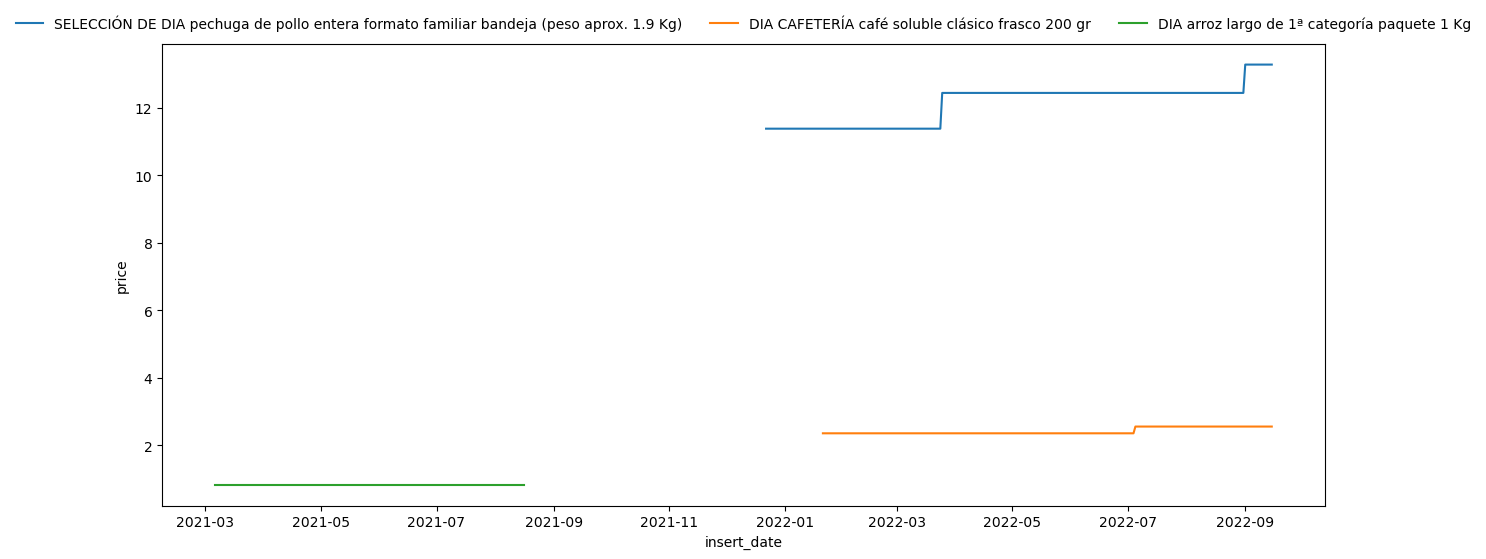

In [13]:
plt.figure(figsize=(15,6))
ax=sns.lineplot(data=cbadia, x="insert_date", y="price", hue="name")
#plt.title('Evol Precios CBA-Dia')
sns.move_legend(ax, "lower center",bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,)

De acuerdo a los datos brindados por el dataset, a primera vista se encuentra el efecto inflacionario que sufre un bien perecedero como el pollo. Donde podemos hacer el supuesto de tomar como base el precio de diciembre del 2021, 11.38 €, y ver los incrementos que sufre el producto en dos momentos del 2022, alcanzando los 13.28 €.  

En el caso del Arroz, vemos que durante el periodo 2021 mantuvo su valor por debajo de un euro. Nos queda investigar porque es que aún no tenemos los datos correspondientes al 2022.

Y en el caso del Café soluble, su precio se mantuvo constante durante el 2022, hasta Julio del mismo año, donde se incrementó de 2.35 € a 5.52 €. Probablemente debido a la inflación y factores estacionales.

### Categorías de productos perteneciente a propia marca de Día

Podemos completar el análisis de precios, al analizar cuáles son las principales categorías de cada marca blanca que, durante este periodo, se posicionan con mayor precio. 
Al trabajar con las tablas filtradas por valores únicos, para evitar registros repetidos, podemos ver las 5 principales categorías.

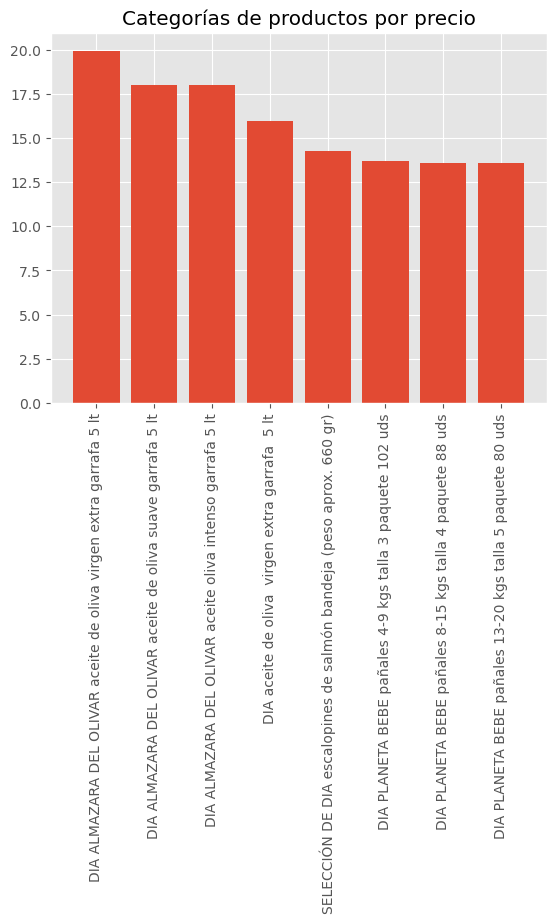

In [14]:
dia_categor = filtro_cat_d.groupby('name')['price'].median().sort_values(ascending=False).head(8)

plt.style.use('ggplot')
plt.bar(dia_categor.index, dia_categor)
plt.xticks(rotation=90)
plt.title('Categorías de productos por precio')
plt.show()

In [15]:
dia_categor = filtro_cat_d.groupby('name')['price'].median().sort_values(ascending=False).head(8)
dia_categor

name
DIA ALMAZARA DEL OLIVAR aceite de oliva virgen extra garrafa 5 lt     19.95
DIA ALMAZARA DEL OLIVAR aceite de oliva suave garrafa 5 lt            17.99
DIA ALMAZARA DEL OLIVAR aceite oliva intenso garrafa 5 lt             17.99
DIA aceite de oliva  virgen extra garrafa  5 lt                       15.99
SELECCIÓN DE DIA escalopines de salmón bandeja (peso aprox. 660 gr)   14.28
DIA PLANETA BEBE pañales 4-9 kgs talla 3 paquete 102 uds              13.69
DIA PLANETA BEBE pañales 8-15 kgs talla 4 paquete 88 uds              13.59
DIA PLANETA BEBE pañales 13-20 kgs talla 5 paquete 80 uds             13.59
Name: price, dtype: float64

## Supermercados Carrefour

Buscamos filtar aquellos productos pertenecientes al Supermercado Carrefour

In [16]:
solocarre = df_productos['Name'] == 'Carrefour'
carrefour = df_productos[solocarre]
carrefour

,Name,category,name,price,insert_date,product_id
2053,Carrefour,bebidas_vinos_rosado,Muga Rosado 2019,9.15,2021-03-06,4a9bb57a9ebbad18dff028c702d70c0e
2054,Carrefour,bebidas_vinos_blanco,Blanc Pescador Espumoso Blanco,3.99,2021-03-06,e2edfbb48927c755131eab0016995453
2055,Carrefour,bebidas_alcoholes_ron,Ron Brugal añejo superior 70 cl.,13.80,2021-03-06,e86bfe04af8fdab975a3ac9a86276e3f
2056,Carrefour,bebidas_vinos_blanco,Arabe Blanco,3.99,2021-03-06,b0077d68ba056d38d0ac11b61909cdd7
2057,Carrefour,bebidas_aguas_y_zumos_agua_hasta_075_litros,Agua mineral Carrefour Kids natural 33 cl.,0.19,2021-03-06,8d83f3fd26260b30a056ba9aba86cd8a
...,...,...,...,...,...,...
8223977,Carrefour,perfumeria_e_higiene_depilacion_y_afeitado_afe...,Espuma de afeitar sensitive Nivea Men 200 ml.,3.05,2022-09-15,0db25207ed2e73d839e0ead0c34d8cac
8223978,Carrefour,perfumeria_e_higiene_depilacion_y_afeitado_afe...,Gel de afeitar Sensitive Nivea Men 200 ml.,3.79,2022-09-15,78fd7919b63b2f4c5d955c87b0939835
8223979,Carrefour,perfumeria_e_higiene_depilacion_y_afeitado_aft...,After shave bálsamo Sensitive Nivea Men 100 ml.,4.75,2022-09-15,e2ac225b7436cf2da4f53e99866316bb
8223980,Carrefour,perfumeria_e_higiene_depilacion_y_afeitado_aft...,After shave bálsamo Classic La Toja 100 ml.,5.45,2022-09-15,2bd2f1b34a3bad85779fe909ea3a0e66


Filtramos aquellos productos que se encuentran bajo la marca blanca de Carrefour.

In [17]:
blancacarrefour=df_productos[df_productos['name'].str.contains('Carrefour', na=False)]
blancacarrefour

,Name,category,name,price,insert_date,product_id
2057,Carrefour,bebidas_aguas_y_zumos_agua_hasta_075_litros,Agua mineral Carrefour Kids natural 33 cl.,0.19,2021-03-06,8d83f3fd26260b30a056ba9aba86cd8a
2059,Carrefour,bebidas_aguas_y_zumos_zumos_refrigerados,Zumo de piña y mango Carrefour Selección expri...,2.05,2021-03-06,adfe3f4d2b7757a578b34cc21185dd47
2076,Carrefour,bebidas_aguas_y_zumos_zumos_refrigerados,"Zumo de uva roja, granada y grosella Carrefour...",1.55,2021-03-06,b371c0878eb4c3525ef1c74aef750669
2088,Carrefour,bebidas_cerveza_negra,Cerveza negra Carrefour botella 33 cl.,0.65,2021-03-06,8e71e0b94a483137019b1782441eca4f
2115,Carrefour,bebidas_alcoholes_vermouth,Vermut Carrefour Monte Esquinza rojo 1 l.,3.11,2021-03-06,49a0d94bbfaeee74db5474aa02e96da4
...,...,...,...,...,...,...
8223962,Carrefour,perfumeria_e_higiene_boca_y_sonrisa_protector_...,Bálsamo labial Carrefour 2 ud.,2.39,2022-09-15,a984257dc8cb0a58709407702f2a0429
8223963,Carrefour,perfumeria_e_higiene_boca_y_sonrisa_protector_...,Vaselina para labios perfumada frambuesa Soft ...,1.60,2022-09-15,86f782ad7b5cd8638f162bcc50c029df
8223973,Carrefour,perfumeria_e_higiene_depilacion_y_afeitado_dep...,Bandas de cera corporales depilatoria frías Ca...,1.55,2022-09-15,a281261f66deb07fce2d8ec9550d7d5e
8223974,Carrefour,perfumeria_e_higiene_depilacion_y_afeitado_dep...,Gel depilatorio piel sensible con manteca de k...,1.99,2022-09-15,a8c45307bc56b483e890932ffb4ebb60


### Valores únicos carrefour

*Buscamos filtrar aquellos valores únicos por categoría*

In [18]:
valores_unicos_carrefour = blancacarrefour['category'].unique()
valores_unicos_carrefour

array(['bebidas_aguas_y_zumos_agua_hasta_075_litros',
       'bebidas_aguas_y_zumos_zumos_refrigerados',
       'bebidas_cerveza_negra', 'bebidas_alcoholes_vermouth',
       'la_despensa_conservas_sopas_y_precocinados_salteados_de_verdura_arroz_y_paella',
       'bebidas_cerveza_artesanas', 'bebidas_cerveza_sin_alcohol',
       'bebidas_cerveza_radler_clara', 'bebidas_cerveza_rubia',
       'bebidas_refrescos_gaseosa', 'bebidas_refrescos_energeticas',
       'bebidas_refrescos_te', 'bebidas_refrescos_tonica',
       'bebidas_refrescos_isotonicas',
       'bebidas_refrescos_sabores_sin_gas',
       'bebidas_refrescos_sabores_con_gas', 'bebidas_refrescos_colas',
       'bebidas_aguas_y_zumos_agua_con_sabor',
       'bebidas_aguas_y_zumos_agua_con_gas',
       'bebidas_aguas_y_zumos_agua_de_mas_de_2_litros',
       'bebidas_alcoholes_cockteles_y_combinados',
       'bebidas_aguas_y_zumos_agua_de_075_a_2_litros',
       'la_despensa_huevos_claras_de_huevo',
       'la_despensa_huevos_huevo

In [19]:
filtro_cat_c = blancacarrefour[blancacarrefour.category.isin
                          (['bebidas_aguas_y_zumos_agua_hasta_075_litros',
                           'bebidas_aguas_y_zumos_zumos_refrigerados',
                           'bebidas_cerveza_negra', 'bebidas_alcoholes_vermouth',
                           'la_despensa_conservas_sopas_y_precocinados_salteados_de_verdura_arroz_y_paella',
                           'bebidas_cerveza_artesanas', 'bebidas_cerveza_sin_alcohol',
                           'bebidas_cerveza_radler_clara', 'bebidas_cerveza_rubia',
                           'bebidas_refrescos_gaseosa', 'bebidas_refrescos_energeticas',
                           'bebidas_refrescos_te', 'bebidas_refrescos_tonica',
                           'bebidas_refrescos_isotonicas',
                           'bebidas_refrescos_sabores_sin_gas',
                           'bebidas_refrescos_sabores_con_gas', 'bebidas_refrescos_colas',
                           'bebidas_aguas_y_zumos_agua_con_sabor',
                           'bebidas_aguas_y_zumos_agua_con_gas',
                           'bebidas_aguas_y_zumos_agua_de_mas_de_2_litros',
                           'bebidas_alcoholes_cockteles_y_combinados',
                           'bebidas_aguas_y_zumos_agua_de_075_a_2_litros',
                           'la_despensa_huevos_claras_de_huevo',
                           'la_despensa_huevos_huevos_frescos', 'la_despensa_helados_bloques',
                           'la_despensa_helados_barquillos',
                           'la_despensa_helados_tartas_heladas',
                           'la_despensa_helados_frutas_heladas',
                           'la_despensa_helados_sandwiches', 'la_despensa_helados_conos',
                           'la_despensa_helados_polos', 'la_despensa_helados_bombon',
                           'la_despensa_helados_tarrinas',
                           'la_despensa_aperitivos_torreznos_y_cortezas',
                           'la_despensa_aperitivos_frutas_desecadas',
                           'la_despensa_aperitivos_galletas_saladas',
                           'bebidas_aguas_y_zumos_zumos_no_refrigerados',
                           'bebidas_vinos_de_mesa', 'la_despensa_aperitivos_palomitas',
                           'bebidas_licores_y_cremas_licores_y_orujo',
                           'la_despensa_aperitivos_tortitas', 'la_despensa_aperitivos_snacks',
                           'la_despensa_aperitivos_patatas_fritas',
                           'la_despensa_aperitivos_aceitunas_y_encurtidos',
                           'la_despensa_aperitivos_frutos_secos',
                           'la_despensa_conservas_sopas_y_precocinados_conservas_de_carne',
                           'la_despensa_conservas_sopas_y_precocinados_conservas_de_frutas',
                           'limpieza_y_hogar_cuidado_de_la_ropa_suavizantes',
                           'limpieza_y_hogar_cuidado_de_la_ropa_aditivos_y_quitamanchas',
                           'limpieza_y_hogar_cuidado_de_la_ropa_limpiadores_y_antical_para_lavadora',
                           'limpieza_y_hogar_cuidado_de_la_ropa_lejias_lavadora',
                           'limpieza_y_hogar_cuidado_de_la_ropa_agua_de_plancha_y_apresto',
                           'limpieza_y_hogar_cuidado_de_la_ropa_toallitas_atrapacolores',
                           'limpieza_y_hogar_papel_y_celulosa_papel_higienico',
                           'limpieza_y_hogar_papel_y_celulosa_papel_cocina_y_multiusos',
                           'limpieza_y_hogar_papel_y_celulosa_panuelos',
                           'limpieza_y_hogar_papel_y_celulosa_toallitas_gafas',
                           'limpieza_y_hogar_productos_para_cocina_lavavajillas_a_maquina',
                           'bebe_panales_y_toallitas_panales_carrefour_baby',
                           'limpieza_y_hogar_productos_para_cocina_lavavajillas_a_mano',
                           'limpieza_y_hogar_productos_para_cocina_aditivos_y_limpiamaquinas',
                           'limpieza_y_hogar_productos_para_cocina_quitagrasas',
                           'limpieza_y_hogar_productos_para_cocina_vitroceramicas_e_induccion',
                           'limpieza_y_hogar_productos_para_cocina_limpiadores_electrodomesticos_cocina',
                           'limpieza_y_hogar_productos_para_bano_wc',
                           'limpieza_y_hogar_productos_para_bano_limpiadores_bano',
                           'limpieza_y_hogar_productos_para_bano_desatascadores_y_limpia_tuberias',
                           'limpieza_y_hogar_productos_para_bano_limpiadores_antical_bano',
                           'limpieza_y_hogar_productos_para_toda_la_casa_suelos',
                           'limpieza_y_hogar_productos_para_toda_la_casa_lejias_y_amoniacos',
                           'limpieza_y_hogar_productos_para_toda_la_casa_limpiacristales_y_multiusos',
                           'bebe_panales_y_toallitas_toallitas',
                           'limpieza_y_hogar_productos_para_toda_la_casa_insecticidas',
                           'limpieza_y_hogar_cuidado_de_la_ropa_detergentes',
                           'limpieza_y_hogar_productos_para_toda_la_casa_limpia_muebles',
                           'limpieza_y_hogar_utensilios_de_limpieza_bayetas_microfibra_atrapapolvo',
                           'limpieza_y_hogar_utensilios_de_limpieza_estropajos',
                           'limpieza_y_hogar_utensilios_de_limpieza_escobas_mopas_y_recogedores',
                           'limpieza_y_hogar_utensilios_de_limpieza_guantes',
                           'limpieza_y_hogar_utensilios_de_limpieza_cubos_de_fregar_y_barrenos',
                           'limpieza_y_hogar_utensilios_de_limpieza_otros_utiles',
                           'limpieza_y_hogar_conservacion_de_alimentos_papel_de_aluminio',
                           'limpieza_y_hogar_conservacion_de_alimentos_bolsas',
                           'limpieza_y_hogar_conservacion_de_alimentos_film_transparente',
                           'bebe_panales_y_toallitas_baberos_protegecamas_y_bolsas_para_panales',
                           'limpieza_y_hogar_conservacion_de_alimentos_papel_y_moldes_para_horno',
                           'limpieza_y_hogar_ambientadores_electricos',
                           'limpieza_y_hogar_ambientadores_automaticos',
                           'limpieza_y_hogar_ambientadores_decorativos',
                           'limpieza_y_hogar_ambientadores_aerosol_o_pistola',
                           'limpieza_y_hogar_ambientadores_absorbeolores',
                           'limpieza_y_hogar_ambientadores_coche',
                           'limpieza_y_hogar_ambientadores_antihumedad',
                           'limpieza_y_hogar_calzado_plantillas_de_calzado',
                           'limpieza_y_hogar_calzado_crema',
                           'bebe_alimentacion_infantil_tarritos_y_platos_preparados',
                           'limpieza_y_hogar_calzado_limpiador_liquido',
                           'bebe_alimentacion_infantil_postres_zumos_petit_y_yogures_infantiles',
                           'limpieza_y_hogar_menaje_hermeticos',
                           'mascotas_perros_pienso_para_perros',
                           'limpieza_y_hogar_papeleria_boligrafos_y_correctores',
                           'limpieza_y_hogar_papeleria_lapices_y_accesorios',
                           'limpieza_y_hogar_papeleria_colorear',
                           'limpieza_y_hogar_papeleria_pequeno_accesorio',
                           'limpieza_y_hogar_papeleria_cuadernos_y_carpetas',
                           'limpieza_y_hogar_papeleria_dibujo_tecnico',
                           'limpieza_y_hogar_bazar_pilas',
                           'bebe_alimentacion_infantil_papillas_y_galletas',
                           'limpieza_y_hogar_bazar_jardineria',
                           'bebe_perfumeria_e_higiene_champu',
                           'limpieza_y_hogar_bazar_pegamentos_y_siliconas',
                           'limpieza_y_hogar_bazar_automovil',
                           'perfumeria_e_higiene_bano_e_higiene_corporal_geles_de_bano',
                           'mascotas_gatos_arena',
                           'perfumeria_e_higiene_bano_e_higiene_corporal_desodorantes',
                           'perfumeria_e_higiene_bano_e_higiene_corporal_jabon_de_manos',
                           'perfumeria_e_higiene_depilacion_y_afeitado_maquinillas_y_recambios',
                           'perfumeria_e_higiene_depilacion_y_afeitado_depilacion',
                           'perfumeria_e_higiene_cosmetica_unas',
                           'perfumeria_e_higiene_cosmetica_accesorios_de_maquillaje_y_manicura_y_pedicura',
                           'bebe_perfumeria_e_higiene_crema_corporal_talcos_y_antiirritacion',
                           'bebe_perfumeria_e_higiene_bastoncillos_algodon_y_sueros',
                           'bebe_embarazo_y_lactancia_discos_pezoneras_y_sacaleches',
                           'mascotas_perros_premios_snacks_y_huesos',
                           'mascotas_perros_champus_para_perro',
                           'mascotas_gatos_pienso_para_gatos',
                           'mascotas_gatos_premios_y_snacks',
                           'mascotas_gatos_accesorios_e_higiene',
                           'mascotas_conejos_y_roedores_pienso_para_conejos_y_rodeores',
                           'mascotas_pajaros_pienso_para_pajaros',
                           'mascotas_peces_y_tortugas_tortugas',
                           'mascotas_peces_y_tortugas_peces',
                           'parafarmacia_bebe_toallitas_bebe',
                           'parafarmacia_higiene_bucal_pasta_de_dientes',
                           'parafarmacia_higiene_bucal_cuidado_y_fijacion_protesis_dentales',
                           'bebe_puericultura_accesorios',
                           'parafarmacia_botiquin_mascarillas',
                           'parafarmacia_botiquin_geles_hidroalcoholicos',
                           'parafarmacia_botiquin_apositos_y_gasas',
                           'parafarmacia_botiquin_lentillas_y_sueros',
                           'parafarmacia_botiquin_antisepticos_y_talcos',
                           'parafarmacia_botiquin_alivio_del_dolor',
                           'parafarmacia_cuidado_e_higiene_facial_desmaquillantes',
                           'parafarmacia_cuidado_e_higiene_facial_cuidado_labial',
                           'parafarmacia_cabello_antiparasitarios',
                           'parafarmacia_cuidado_de_manos_y_pies_soluciones_durezas',
                           'parafarmacia_cuidado_de_manos_y_pies_crema_de_manos',
                           'parafarmacia_cuidado_de_manos_y_pies_apositos_y_plantillas',
                           'el_mercado_carniceria_vacuno', 'el_mercado_carniceria_cerdo',
                           'el_mercado_carniceria_aves_y_pollo',
                           'el_mercado_pescaderia_pescado_fresco',
                           'el_mercado_carniceria_preparados_y_arreglos_de_carne',
                           'el_mercado_carniceria_embutidos_frescos',
                           'el_mercado_carniceria_hamburguesas',
                           'el_mercado_carniceria_carne_picada',
                           'el_mercado_carniceria_otras_carnes',
                           'el_mercado_carniceria_conejo', 'el_mercado_carniceria_cordero',
                           'el_mercado_panaderia_bolleria_y_pasteleria_pan_de_molde_tostado_y_picos',
                           'el_mercado_panaderia_bolleria_y_pasteleria_bolleria_tradicional',
                           'el_mercado_panaderia_bolleria_y_pasteleria_magdalenas_dulces_y_bollos',
                           'el_mercado_panaderia_bolleria_y_pasteleria_pasteleria_y_reposteria',
                           'el_mercado_panaderia_bolleria_y_pasteleria_masa_fresca_y_bases',
                           'el_mercado_panaderia_bolleria_y_pasteleria_empanadas_empanadillas_y_hojaldres',
                           'el_mercado_charcuteria_fiambre_de_pavo_y_pollo',
                           'el_mercado_charcuteria_jamon_cocido_y_lacon',
                           'el_mercado_charcuteria_jamon_serrano_e_iberico_envasado',
                           'el_mercado_charcuteria_jamon_serrano_e_iberico_pieza',
                           'el_mercado_charcuteria_chorizo_lomo_y_otros',
                           'el_mercado_charcuteria_salchichon_salami_y_fuet',
                           'el_mercado_charcuteria_salchichas',
                           'el_mercado_charcuteria_bacon_y_panceta',
                           'el_mercado_charcuteria_foie_pates_y_sobrasadas',
                           'el_mercado_charcuteria_mortadela_y_chopped',
                           'el_mercado_charcuteria_tablas_y_surtidos',
                           'el_mercado_charcuteria_y_quesos_al_corte_jamones_y_paletas_curados',
                           'el_mercado_charcuteria_y_quesos_al_corte_curados_y_embutidos',
                           'el_mercado_charcuteria_y_quesos_al_corte_quesos_nacionales',
                           'el_mercado_charcuteria_y_quesos_al_corte_quesos_barra_y_frescos',
                           'el_mercado_charcuteria_y_quesos_al_corte_quesos_internacionales',
                           'el_mercado_quesos_semicurado', 'el_mercado_quesos_curado',
                           'el_mercado_quesos_anejo', 'el_mercado_quesos_tierno',
                           'el_mercado_quesos_queso_fresco', 'el_mercado_quesos_rallados',
                           'el_mercado_quesos_brie_y_camembert', 'el_mercado_quesos_fundidos',
                           'el_mercado_quesos_gouda_y_emmental',
                           'el_mercado_quesos_crema_de_queso',
                           'el_mercado_quesos_con_denominacion_origen',
                           'el_mercado_quesos_azules_y_roquefort',
                           'el_mercado_quesos_otros_internacionales',
                           'el_mercado_pescaderia_marisco_almejas_y_mejillones',
                           'el_mercado_pescaderia_pulpo_calamar_y_sepia',
                           'el_mercado_pescaderia_pescado_y_marisco_congelado',
                           'el_mercado_pescaderia_ahumados_y_huevas',
                           'el_mercado_pescaderia_gulas_surimi_elaborados',
                           'el_mercado_pescaderia_bacalao_y_salazones',
                           'el_mercado_pescaderia_preparados_y_elaborados_de_pescado_y_marisco',
                           'el_mercado_frutas_naranjas_y_otros_citricos',
                           'el_mercado_frutas_fruta_de_temporada',
                           'el_mercado_frutas_manzanas_y_peras',
                           'el_mercado_frutas_platanos_y_bananas',
                           'el_mercado_frutas_pinas_kiwis_aguacates_y_tropicales',
                           'el_mercado_frutas_sandias_y_melones',
                           'el_mercado_verduras_y_hortalizas_hortalizas',
                           'el_mercado_verduras_y_hortalizas_patatas_cebollas_y_ajos',
                           'el_mercado_verduras_y_hortalizas_ensaladas_y_verduras_preparadas',
                           'el_mercado_verduras_y_hortalizas_tomates_y_pepinos',
                           'el_mercado_verduras_y_hortalizas_verduras_y_hortalizas_congeladas',
                           'el_mercado_verduras_y_hortalizas_setas_y_hongos',
                           'el_mercado_verduras_y_hortalizas_infusiones_mieles_y_hierbas_aromaticas',
                           'el_mercado_panaderia_bolleria_y_pasteleria_panaderia_tradicional',
                           'el_mercado_la_cocina_de_carrefour_platos_de_carne_y_pescado',
                           'el_mercado_la_cocina_de_carrefour_pasta_y_pizza',
                           'el_mercado_la_cocina_de_carrefour_platos_de_verdura',
                           'la_despensa_alimentacion_aceites_y_vinagres',
                           'el_mercado_la_cocina_de_carrefour_cocina_internacional',
                           'el_mercado_la_cocina_de_carrefour_ensaladas_gazpachos_y_sandwiches',
                           'la_despensa_alimentacion_salsas_y_tomate_frito',
                           'la_despensa_alimentacion_pastas',
                           'la_despensa_alimentacion_arroz_y_cous_cous',
                           'la_despensa_alimentacion_legumbres',
                           'la_despensa_alimentacion_especias_y_sazonadores',
                           'la_despensa_alimentacion_harinas_y_levaduras',
                           'la_despensa_alimentacion_sales_y_bicarbonatos',
                           'la_despensa_alimentacion_vitaminas_y_complementos',
                           'la_despensa_alimentacion_semillas',
                           'la_despensa_alimentacion_vino_de_cocinar',
                           'la_despensa_lacteos_leche_entera', 'la_despensa_lacteos_bebida_vegetal',
                           'la_despensa_lacteos_batidos_y_horchatas',
                           'la_despensa_lacteos_mantequillas_y_margarinas',
                           'la_despensa_lacteos_nata',
                           'la_despensa_lacteos_leche_condensada_evaporada_y_en_polvo',
                           'la_despensa_lacteos_listo_para_beber',
                           'la_despensa_lacteos_bechamel',
                           'la_despensa_dulce_y_desayuno_cafes',
                           'la_despensa_dulce_y_desayuno_galletas',
                           'la_despensa_dulce_y_desayuno_chocolates_turrones_y_bombones',
                           'la_despensa_dulce_y_desayuno_cereales_y_barritas',
                           'la_despensa_dulce_y_desayuno_azucar_y_edulcorantes',
                           'la_despensa_dulce_y_desayuno_cacaos_y_cereales_solubles',
                           'la_despensa_dulce_y_desayuno_infusiones_y_tes',
                           'la_despensa_dulce_y_desayuno_dulces_y_golosinas',
                           'la_despensa_dulce_y_desayuno_mermeladas_membrillos_y_compotas',
                           'la_despensa_dulce_y_desayuno_cremas_de_cacao_avellana_y_cacahuete',
                           'la_despensa_dulce_y_desayuno_reposteria_para_preparar',
                           'la_despensa_dulce_y_desayuno_miel',
                           'la_despensa_dulce_y_desayuno_siropes_aromas_y_decoracion',
                           'la_despensa_yogures_y_postres_yogur_natural_y_sabores',
                           'la_despensa_yogures_y_postres_bifidus',
                           'la_despensa_yogures_y_postres_colesterol_oseo_y_tension',
                           'la_despensa_yogures_y_postres_yogures_griegos_y_enriquecidos',
                           'la_despensa_yogures_y_postres_yogures_infantiles',
                           'la_despensa_yogures_y_postres_yogures_desnatados',
                           'la_despensa_yogures_y_postres_yogures_liquidos',
                           'la_despensa_yogures_y_postres_otros_postres',
                           'la_despensa_yogures_y_postres_natillas_cremas_y_copas',
                           'la_despensa_yogures_y_postres_gelatina',
                           'la_despensa_yogures_y_postres_flanes',
                           'la_despensa_yogures_y_postres_mousse',
                           'la_despensa_yogures_y_postres_vegetal',
                           'la_despensa_yogures_y_postres_proteina',
                           'perfumeria_e_higiene_bano_e_higiene_corporal_colonias',
                           'perfumeria_e_higiene_bano_e_higiene_corporal_esponjas_manoplas_y_cepillos_de_bano',
                           'perfumeria_e_higiene_bano_e_higiene_corporal_ojos_y_oreja',
                           'perfumeria_e_higiene_cabello_champus',
                           'perfumeria_e_higiene_cabello_cuidado_y_tratamientos_del_cabello',
                           'perfumeria_e_higiene_cabello_acondicionadores',
                           'perfumeria_e_higiene_cabello_fijadores',
                           'perfumeria_e_higiene_cuidado_y_proteccion_corporal_piel',
                           'perfumeria_e_higiene_cuidado_y_proteccion_corporal_body_milk_hidratacion_bajo_la_ducha',
                           'perfumeria_e_higiene_cuidado_y_proteccion_corporal_limpieza_facial',
                           'perfumeria_e_higiene_cuidado_y_proteccion_corporal_productos_para_viaje',
                           'perfumeria_e_higiene_cuidado_y_proteccion_corporal_pies',
                           'perfumeria_e_higiene_boca_y_sonrisa_enjuagues_bucales',
                           'perfumeria_e_higiene_boca_y_sonrisa_cepillos_recambios_y_accesorios',
                           'perfumeria_e_higiene_boca_y_sonrisa_protector_labial',
                           'perfumeria_e_higiene_higiene_intima_compresas',
                           'perfumeria_e_higiene_higiene_intima_tampones',
                           'perfumeria_e_higiene_higiene_intima_protege_slip',
                           'perfumeria_e_higiene_higiene_intima_incontinencia',
                           'perfumeria_e_higiene_higiene_intima_toallitas_y_geles_intimos',
                           'la_despensa_conservas_sopas_y_precocinados_gazpacho_y_salmorejo',
                           'la_despensa_conservas_sopas_y_precocinados_conservas_de_pescado_y_marisco',
                           'la_despensa_conservas_sopas_y_precocinados_caldos_sopas_y_pure',
                           'la_despensa_conservas_sopas_y_precocinados_pizzas',
                           'la_despensa_conservas_sopas_y_precocinados_conservas_de_vegetales',
                           'la_despensa_conservas_sopas_y_precocinados_platos_preparados',
                           'la_despensa_conservas_sopas_y_precocinados_croquetas_y_rebozados',
                           'la_despensa_conservas_sopas_y_precocinados_conservas_de_tomate',
                           'la_despensa_conservas_sopas_y_precocinados_platos_tradicionales',
                           'la_despensa_conservas_sopas_y_precocinados_tortillas_empanadillas_y_sandwiches',
                           'limpieza_y_hogar_bazar_bombillas_y_tubos',
                           'bebidas_alcoholes_todos_los_alcoholes',
                           'el_mercado_charcuteria_y_quesos_al_corte_fiambres_y_cocidos',
                           'bebidas_vinos_generosos_y_dulces',
                           'perfumeria_e_higiene_boca_y_sonrisa_dentifricos',
                           'el_mercado_quesos_todos_los_quesos',
                           'el_mercado_carniceria_casqueria',
                           'bebe_panales_y_toallitas_panales_de_noche',
                           'bebe_perfumeria_e_higiene_jabon_liquido',
                           'perfumeria_e_higiene_cosmetica_rostro',
                           'parafarmacia_bebe_champu',
                           'parafarmacia_bebe_embarazo_y_lactancia', 'el_mercado_frutas_uvas',
                           'el_mercado_frutas_frutos_del_bosque',
                           'bebidas_cerveza_todas_las_cervezas',
                           'productos_frescos_verduras_y_hortalizas_infusiones_mieles_y_hierbas_aromaticas',
                           'productos_frescos_panaderia_bolleria_y_pasteleria_panaderia_tradicional',
                           'productos_frescos_panaderia_bolleria_y_pasteleria_pan_de_molde_tostado_y_picos',
                           'productos_frescos_panaderia_bolleria_y_pasteleria_bolleria_tradicional',
                           'productos_frescos_panaderia_bolleria_y_pasteleria_magdalenas_dulces_y_bollos',
                           'productos_frescos_panaderia_bolleria_y_pasteleria_pasteleria_y_reposteria',
                           'productos_frescos_panaderia_bolleria_y_pasteleria_masa_fresca_y_bases',
                           'productos_frescos_panaderia_bolleria_y_pasteleria_empanadas_empanadillas_y_hojaldres',
                           'productos_frescos_charcuteria_fiambre_de_pavo_y_pollo',
                           'productos_frescos_charcuteria_jamon_cocido_y_lacon',
                           'productos_frescos_charcuteria_jamon_serrano_e_iberico_envasado',
                           'productos_frescos_charcuteria_jamon_serrano_e_iberico_pieza',
                           'productos_frescos_charcuteria_chorizo_lomo_y_otros',
                           'productos_frescos_charcuteria_salchichon_salami_y_fuet',
                           'productos_frescos_charcuteria_salchichas',
                           'productos_frescos_charcuteria_bacon_y_panceta',
                           'productos_frescos_charcuteria_foie_pates_y_sobrasadas',
                           'productos_frescos_charcuteria_mortadela_y_chopped',
                           'productos_frescos_charcuteria_tablas_y_surtidos',
                           'productos_frescos_charcuteria_y_quesos_al_corte_jamones_y_paletas_curados',
                           'productos_frescos_charcuteria_y_quesos_al_corte_curados_y_embutidos',
                           'productos_frescos_charcuteria_y_quesos_al_corte_quesos_nacionales',
                           'productos_frescos_charcuteria_y_quesos_al_corte_quesos_barra_y_frescos',
                           'productos_frescos_charcuteria_y_quesos_al_corte_quesos_internacionales',
                           'productos_frescos_quesos_semicurado',
                           'productos_frescos_quesos_curado',
                           'productos_frescos_quesos_tierno',
                           'productos_frescos_quesos_queso_fresco',
                           'productos_frescos_verduras_y_hortalizas_hortalizas',
                           'productos_frescos_verduras_y_hortalizas_patatas_cebollas_y_ajos',
                           'productos_frescos_verduras_y_hortalizas_ensaladas_y_verduras_preparadas',
                           'productos_frescos_verduras_y_hortalizas_tomates_y_pepinos',
                           'productos_frescos_verduras_y_hortalizas_verduras_y_hortalizas_congeladas',
                           'productos_frescos_verduras_y_hortalizas_setas_y_hongos',
                           'productos_frescos_quesos_crema_de_queso',
                           'productos_frescos_quesos_con_denominacion_origen',
                           'productos_frescos_quesos_azules_y_roquefort',
                           'productos_frescos_quesos_otros_internacionales',
                           'productos_frescos_quesos_rallados',
                           'productos_frescos_quesos_brie_y_camembert',
                           'productos_frescos_quesos_fundidos',
                           'productos_frescos_la_cocina_de_carrefour_platos_de_carne_y_pescado',
                           'productos_frescos_la_cocina_de_carrefour_pasta_y_pizza',
                           'productos_frescos_la_cocina_de_carrefour_platos_de_verdura',
                           'productos_frescos_la_cocina_de_carrefour_cocina_internacional',
                           'productos_frescos_la_cocina_de_carrefour_ensaladas_gazpachos_y_sandwiches',
                           'productos_frescos_quesos_gouda_y_emmental',
                           'productos_frescos_frutas_fruta_de_temporada',
                           'productos_frescos_frutas_manzanas_y_peras',
                           'productos_frescos_frutas_platanos_y_bananas',
                           'productos_frescos_frutas_pinas_kiwis_aguacates_y_tropicales',
                           'productos_frescos_frutas_sandias_y_melones',
                           'productos_frescos_carniceria_aves_y_pollo',
                           'productos_frescos_carniceria_vacuno',
                           'productos_frescos_carniceria_cerdo',
                           'productos_frescos_carniceria_cordero',
                           'productos_frescos_carniceria_conejo',
                           'productos_frescos_carniceria_otras_carnes',
                           'productos_frescos_carniceria_carne_picada',
                           'productos_frescos_carniceria_hamburguesas',
                           'productos_frescos_carniceria_embutidos_frescos',
                           'productos_frescos_carniceria_preparados_y_arreglos_de_carne',
                           'productos_frescos_carniceria_casqueria',
                           'productos_frescos_pescaderia_pescado_fresco',
                           'productos_frescos_pescaderia_marisco_almejas_y_mejillones',
                           'productos_frescos_pescaderia_pulpo_calamar_y_sepia',
                           'productos_frescos_pescaderia_pescado_y_marisco_congelado',
                           'productos_frescos_pescaderia_ahumados_y_huevas',
                           'productos_frescos_pescaderia_bacalao_y_salazones',
                           'productos_frescos_pescaderia_preparados_y_elaborados_de_pescado_y_marisco',
                           'productos_frescos_frutas_naranjas_y_otros_citricos',
                           'productos_frescos_frutas_uvas',
                           'limpieza_y_hogar_ambientadores_un_toque', 'bebidas_vinos_rosado',
                           'productos_frescos_la_cocina_de_carrefour_pastas_y_pizzas',
                           'productos_frescos_la_cocina_de_carrefour_fritos',
                           'productos_frescos_frutas_frutos_del_bosque',
                           'productos_frescos_pescaderia_gulas_surimi_elaborados',
                           'productos_frescos_quesos_todos_los_quesos',
                           'productos_frescos_la_cocina_de_carrefour_tortillas',
                           'productos_frescos_quesos_anejo',
                           'bebidas_refrescos_bitter_y_ginger_ale',
                           'bebe_panales_y_toallitas_banadores',
                           'parafarmacia_botiquin_oido_y_protectores',
                           'parafarmacia_botiquin_termometro_y_tensiometros',
                           'la_despensa_helados_hielo',
                           'limpieza_y_hogar_productos_para_bano_limpiajuntas',
                           'bebidas_vinos_todos_los_vinos',
                           'productos_frescos_sushi_del_dia_carniceria',
                           'productos_frescos_sushi_del_dia_la_cocina_de_carrefour',
                           'productos_frescos_sushi_del_dia_pescaderia',
                           'productos_frescos_sushi_del_dia_frutas',
                           'productos_frescos_sushi_del_dia_verduras_y_hortalizas',
                           'productos_frescos_sushi_del_dia_panaderia_bolleria_y_pasteleria',
                           'productos_frescos_sushi_del_dia_charcuteria',
                           'productos_frescos_quesos_tablas_de_quesos',
                           'bebidas_vinos_blanco', 'mascotas_perros_collares_y_correas',
                           'limpieza_y_hogar_bazar_herramientas',
                           'bebidas_cerveza_tostada__roja',
                           'productos_frescos_frutas_fruta_de_hueso',
                           'productos_frescos_carniceria_empanados',
                           'productos_frescos_charcuteria_rincon_del_jamon',
                           'mascotas_perros_higiene',
                           'la_despensa_cestas_y_lotes_lotes_de_jamon',
                           'productos_frescos_panaderia_bolleria_y_pasteleria_panettones',
                           'productos_frescos_sushi_del_dia_quesos',
                           'bebe_puericultura_baberos_protegecamas_y_bolsas_para_panales',
                           'productos_frescos_panaderia_bolleria_y_pasteleria_roscones_de_reyes',
                           'limpieza_y_hogar_menaje_manteleria',
                           'productos_frescos_charcuteria_y_quesos_al_corte_jamon_a_cuchillo',
                           'bebe_panales_y_toallitas_panales_de_aprendizaje',
                           'limpieza_y_hogar_calzado_esponjas_autobrillantes',
                           'mascotas_perros_juguetes', 'mascotas_perros_confort',
                           'productos_frescos_carniceria_piezas_enteras_sin_corte',
                           'limpieza_y_hogar_papeleria_dibujo_artistico',
                           'bebe_panales_y_toallitas_otras_marcas',
                           'perfumeria_e_higiene_depilacion_y_afeitado_afeitado',
                           'bebidas_vinos_sangria_y_tinto_de_verano', 'bebidas_vinos_tinto',
                           'productos_frescos_la_cocina_de_carrefour_arroces',
                           'limpieza_y_hogar_bazar_barbacoas_y_accesorios',
                           'productos_frescos_verduras_y_hortalizas_hierbas_aromaticas_y_especias',
                           'mascotas_perros_comederos',])]
filtro_cat_c

,Name,category,name,price,insert_date,product_id
2057,Carrefour,bebidas_aguas_y_zumos_agua_hasta_075_litros,Agua mineral Carrefour Kids natural 33 cl.,0.19,2021-03-06,8d83f3fd26260b30a056ba9aba86cd8a
2059,Carrefour,bebidas_aguas_y_zumos_zumos_refrigerados,Zumo de piña y mango Carrefour Selección expri...,2.05,2021-03-06,adfe3f4d2b7757a578b34cc21185dd47
2076,Carrefour,bebidas_aguas_y_zumos_zumos_refrigerados,"Zumo de uva roja, granada y grosella Carrefour...",1.55,2021-03-06,b371c0878eb4c3525ef1c74aef750669
2088,Carrefour,bebidas_cerveza_negra,Cerveza negra Carrefour botella 33 cl.,0.65,2021-03-06,8e71e0b94a483137019b1782441eca4f
2115,Carrefour,bebidas_alcoholes_vermouth,Vermut Carrefour Monte Esquinza rojo 1 l.,3.11,2021-03-06,49a0d94bbfaeee74db5474aa02e96da4
...,...,...,...,...,...,...
8223962,Carrefour,perfumeria_e_higiene_boca_y_sonrisa_protector_...,Bálsamo labial Carrefour 2 ud.,2.39,2022-09-15,a984257dc8cb0a58709407702f2a0429
8223963,Carrefour,perfumeria_e_higiene_boca_y_sonrisa_protector_...,Vaselina para labios perfumada frambuesa Soft ...,1.60,2022-09-15,86f782ad7b5cd8638f162bcc50c029df
8223973,Carrefour,perfumeria_e_higiene_depilacion_y_afeitado_dep...,Bandas de cera corporales depilatoria frías Ca...,1.55,2022-09-15,a281261f66deb07fce2d8ec9550d7d5e
8223974,Carrefour,perfumeria_e_higiene_depilacion_y_afeitado_dep...,Gel depilatorio piel sensible con manteca de k...,1.99,2022-09-15,a8c45307bc56b483e890932ffb4ebb60


### CBA Carrefour (CBA: Canasta Básica Alimentaria - Tres ítems) 

*Analizamos los precios de tres productos pertenecientes a la Canasta Básica Alimentaria: **Arroz, Pollo y Café**. Evaluar los mismos productos para cada marca blanca nos permite estandarizar el análisis y lograr una mayor precisión.* 

In [20]:
cbacarrefour = filtro_cat_c[filtro_cat_c.name.str.contains('Arroz largo categoría extra|Pechuga de pollo Carrefour 1,2 kg aprox|Café soluble natural Carrefour')]#No figura leche entera #Azúcar blanco Carrefour 1 kg
cbacarrefour.sort_values(by='price',ascending=False,inplace=True)
cbacarrefour


C:\Users\Usuario\AppData\Local\Temp\ipykernel_9268\3412602806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbacarrefour.sort_values(by='price',ascending=False,inplace=True)


,Name,category,name,price,insert_date,product_id
7201663,Carrefour,productos_frescos_carniceria_aves_y_pollo,"Pechuga de pollo Carrefour 1,2 kg aprox",7.14,2022-07-04,1cd52d4906c3e18f887912067d089926
7052560,Carrefour,productos_frescos_carniceria_aves_y_pollo,"Pechuga de pollo Carrefour 1,2 kg aprox",7.14,2022-06-23,c5959867bf005cf3955d825f36ceb2dc
7080233,Carrefour,productos_frescos_carniceria_aves_y_pollo,"Pechuga de pollo Carrefour 1,2 kg aprox",7.14,2022-06-25,c5959867bf005cf3955d825f36ceb2dc
7096019,Carrefour,productos_frescos_carniceria_aves_y_pollo,"Pechuga de pollo Carrefour 1,2 kg aprox",7.14,2022-06-26,c5959867bf005cf3955d825f36ceb2dc
7108544,Carrefour,productos_frescos_carniceria_aves_y_pollo,"Pechuga de pollo Carrefour 1,2 kg aprox",7.14,2022-06-27,c5959867bf005cf3955d825f36ceb2dc
...,...,...,...,...,...,...
594304,Carrefour,la_despensa_alimentacion_arroz_y_cous_cous,Arroz largo categoría extra Carrefour 1 kg.,0.82,2021-04-04,a05bc5d997bc714eb87b00366bf56351
1232060,Carrefour,la_despensa_alimentacion_arroz_y_cous_cous,Arroz largo categoría extra Carrefour 1 kg.,0.82,2021-05-18,a05bc5d997bc714eb87b00366bf56351
1591249,Carrefour,la_despensa_alimentacion_arroz_y_cous_cous,Arroz largo categoría extra Carrefour 1 kg.,0.82,2021-06-11,a05bc5d997bc714eb87b00366bf56351
567301,Carrefour,la_despensa_alimentacion_arroz_y_cous_cous,Arroz largo categoría extra Carrefour 1 kg.,0.82,2021-04-03,a05bc5d997bc714eb87b00366bf56351


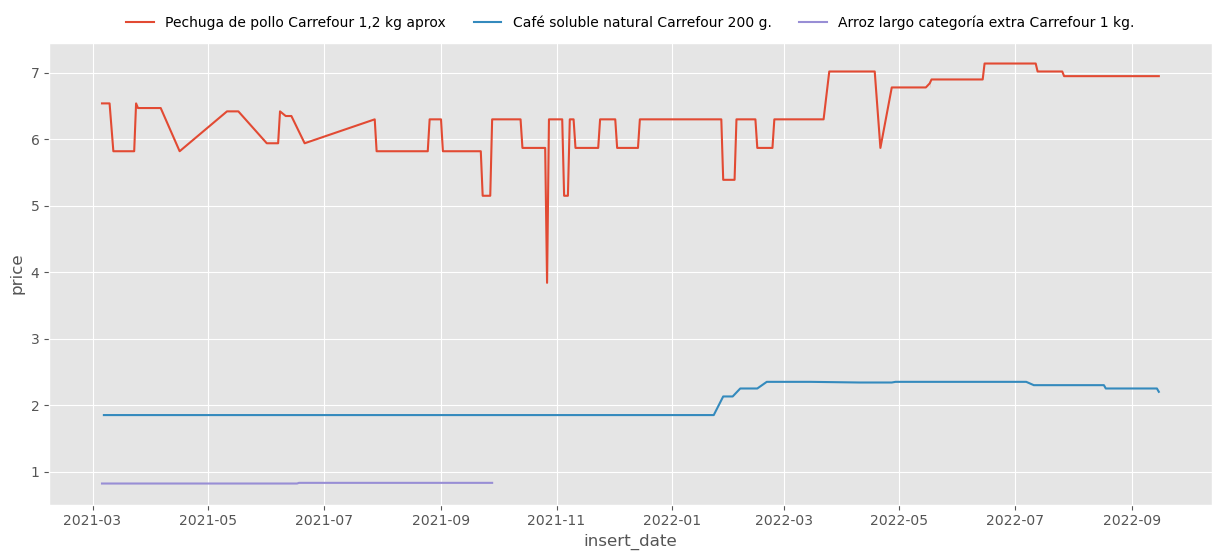

In [21]:
plt.figure(figsize=(15,6))
ax=sns.lineplot(data=cbacarrefour, x="insert_date", y="price", hue="name") 
#plt.title('Evol Precios CBA-Carrefour')
sns.move_legend(ax, "lower center",bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,)

De manera similar que en el caso de Día, el precio del arroz se mantiene durante el periodo 2021 por debajo de un euro y aún no contamos con los valores para el 2022 registrados.

En el caso del café, durante el 2021 mantuvo su valor. En Febrero incrementó su valor de 1.90 € a 2.25 € y luego sufrió otros incrementos, los cuales deben producirse como resultado de la presión inflacionaria.

Podemos plantear la hipótesis de que las fluctuaciones que sufre un alimento como el pollo, se deben a que, como mencionamos anteriormente, la fecha con la que trabajamos se corresponde con la fecha en la que el producto es puesto a la venta. Y como efecto de la inflación, la remarcación en este tipo de productos es más frecuente.


### Categorías de productos perteneciente a propia marca de Carrefour

Podemos completar el análisis de precios, al analizar cuáles son las principales categorías de cada marca blanca que, durante este periodo, se posicionan con mayor precio. 
Al trabajar con las tablas filtradas por valores únicos, para evitar registros repetidos, podemos ver las 5 principales categorías.

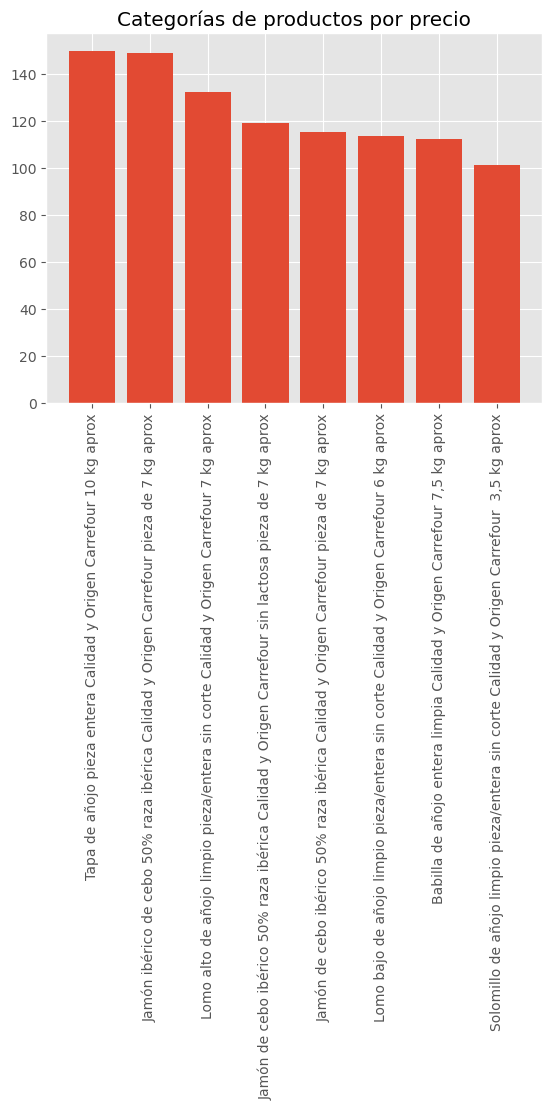

In [22]:
carrefour_categor = filtro_cat_c.groupby('name')['price'].median().sort_values(ascending=False).head(8)

plt.style.use('ggplot')
plt.bar(carrefour_categor.index, carrefour_categor)
plt.xticks(rotation=90)
plt.title('Categorías de productos por precio')
plt.show()

In [23]:
carrefour_categor = filtro_cat_c.groupby('name')['price'].median().sort_values(ascending=False).head(8)
carrefour_categor

name
Tapa de añojo pieza entera Calidad y Origen Carrefour 10 kg aprox                                   149.90
Jamón ibérico de cebo 50% raza ibérica Calidad y Origen Carrefour pieza de 7 kg aprox               149.00
Lomo alto de añojo limpio pieza/entera sin corte Calidad y Origen Carrefour 7 kg aprox              132.23
Jamón de cebo ibérico 50% raza ibérica Calidad y Origen Carrefour sin lactosa pieza de 7 kg aprox   119.00
Jamón de cebo ibérico 50% raza ibérica Calidad y Origen Carrefour pieza de 7 kg aprox               115.00
Lomo bajo de añojo limpio pieza/entera sin corte Calidad y Origen Carrefour 6 kg aprox              113.34
Babilla de añojo entera limpia Calidad y Origen Carrefour 7,5 kg aprox                              112.42
Solomillo de añojo limpio pieza/entera sin corte Calidad y Origen Carrefour  3,5 kg aprox           101.15
Name: price, dtype: float64

## Supermercado Mercadona

Buscamos filtar aquellos productos pertenecientes al Supermercado Mercadona

In [24]:
solomercadona = df_productos['Name'] == 'Mercadona'
mercadona = df_productos[solomercadona]
mercadona

,Name,category,name,price,insert_date,product_id
1055,Mercadona,agua_y_refrescos_isotonico_y_energetico,Bebida para deportistas sabor cítrico Hacendado,0.85,2021-03-06,cc6af45cd819ddd9c69c7a574b840e29
1056,Mercadona,agua_y_refrescos_isotonico_y_energetico,Bebida para deportistas sabor cítrico Hacendado,1.92,2021-03-06,f6a62a8c304a0e818f869aa2ea02df8a
1057,Mercadona,agua_y_refrescos_isotonico_y_energetico,Bebida para deportistas sabor cítrico Hacendado,0.32,2021-03-06,90361e7447fa2d5d4ea757b57d4e6a64
1058,Mercadona,agua_y_refrescos_isotonico_y_energetico,Bebida isotónica naranja Aquarius,1.55,2021-03-06,ed6b157243bb5b81f11dccd5b5d394e9
1059,Mercadona,agua_y_refrescos_isotonico_y_energetico,Bebida isotónica naranja Aquarius,5.92,2021-03-06,727c0bb06307a6fe756835b1d0eea3e6
...,...,...,...,...,...,...
8223986,Mercadona,fruta_y_verdura_fruta,Granada,0.62,2022-09-15,5d5c39d669d3dcac2549932b2d4790c4
8223987,Mercadona,fruta_y_verdura_verdura,Tomate ensalada,2.09,2022-09-15,83dca36ff54e06879a2d14d2f4120859
8223989,Mercadona,fruta_y_verdura_verdura,Pepino,0.38,2022-09-15,e390924043f9e289d1db5d60f24a98df
8223990,Mercadona,fruta_y_verdura_fruta,Nectarinas mini,2.19,2022-09-15,57bff22438b12272070fc553423dc6ee


- En el caso particular de Mercadona, sus marcas blancas llevan distintos nombres:
    - Hacendado.
    - Bosque Verde.
    - Deliplus.
    - Steinburg.
- Por lo que debemos filtrar a cada una de ellas

In [25]:
blancamercadona = df_productos[df_productos.name.str.contains('Hacendado|Bosque Verde|Deliplus|Steinburg',na=False)]
blancamercadona.sort_values(by='price',ascending=False,inplace=True)
blancamercadona.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9268\4082978788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blancamercadona.sort_values(by='price',ascending=False,inplace=True)


,Name,category,name,price,insert_date,product_id
1786494,Mercadona,congelados_marisco,Carabinero Hacendado congelado,79.95,2021-06-24,c68e5387416b6f52656fbef6271c235d
1913030,Mercadona,congelados_marisco,Carabinero Hacendado congelado,79.95,2021-07-03,c68e5387416b6f52656fbef6271c235d
1827431,Mercadona,congelados_marisco,Carabinero Hacendado congelado,79.95,2021-06-27,c68e5387416b6f52656fbef6271c235d
1457193,Mercadona,congelados_marisco,Carabinero Hacendado congelado,79.95,2021-06-02,c68e5387416b6f52656fbef6271c235d
2685685,Mercadona,congelados_marisco,Carabinero Hacendado congelado,79.95,2021-08-25,c68e5387416b6f52656fbef6271c235d


### Valores únicos Mercadona

*Buscamos filtrar aquellos valores únicos por categoría*

In [26]:
valores_unicos_mercadona = blancamercadona['category'].unique()
valores_unicos_mercadona

array(['congelados_marisco', 'marisco_y_pescado_marisco',
       'charcuteria_y_quesos_jamon_serrano', 'carne_cerdo',
       'congelados_pescado', 'marisco_y_pescado_pescado_congelado',
       'carne_conejo_y_cordero',
       'aceite_especias_y_salsas_aceite_vinagre_y_sal',
       'charcuteria_y_quesos_queso_curado_semicurado_y_tierno',
       'bebe_toallitas_y_panales',
       'limpieza_y_hogar_pilas_y_bolsas_de_basura',
       'limpieza_y_hogar_utensilios_de_limpieza_y_calzado',
       'cuidado_facial_y_corporal_higiene_intima',
       'bebe_biberon_chupete_y_menaje', 'congelados_tartas_y_churros',
       'maquillaje_pinceles_y_brochas',
       'conservas_caldos_y_cremas_atun_y_otras_conservas_de_pescado',
       'marisco_y_pescado_pescado_en_bandeja',
       'panaderia_y_pasteleria_tartas_y_pasteles',
       'marisco_y_pescado_salazones_y_ahumados',
       'huevos_leche_y_mantequilla_leche_y_bebidas_vegetales',
       'cuidado_facial_y_corporal_cuidado_e_higiene_facial',
       'maq

In [27]:
filtro_cat_m = blancamercadona[blancamercadona.category.isin
                               (['congelados_marisco', 'marisco_y_pescado_marisco',
                                   'charcuteria_y_quesos_jamon_serrano', 'carne_cerdo',
                                   'congelados_pescado', 'marisco_y_pescado_pescado_congelado',
                                   'carne_conejo_y_cordero',
                                   'aceite_especias_y_salsas_aceite_vinagre_y_sal',
                                   'charcuteria_y_quesos_queso_curado_semicurado_y_tierno',
                                   'bebe_toallitas_y_panales',
                                   'limpieza_y_hogar_pilas_y_bolsas_de_basura',
                                   'limpieza_y_hogar_utensilios_de_limpieza_y_calzado',
                                   'cuidado_facial_y_corporal_higiene_intima',
                                   'bebe_biberon_chupete_y_menaje', 'congelados_tartas_y_churros',
                                   'maquillaje_pinceles_y_brochas',
                                   'conservas_caldos_y_cremas_atun_y_otras_conservas_de_pescado',
                                   'marisco_y_pescado_pescado_en_bandeja',
                                   'panaderia_y_pasteleria_tartas_y_pasteles',
                                   'marisco_y_pescado_salazones_y_ahumados',
                                   'huevos_leche_y_mantequilla_leche_y_bebidas_vegetales',
                                   'cuidado_facial_y_corporal_cuidado_e_higiene_facial',
                                   'maquillaje_ojos', 'limpieza_y_hogar_lejia_y_liquidos_fuertes',
                                   'limpieza_y_hogar_detergente_y_suavizante_ropa',
                                   'cuidado_facial_y_corporal_cuidado_corporal',
                                   'cuidado_facial_y_corporal_afeitado_y_cuidado_para_hombre',
                                   'pizzas_y_platos_preparados_platos_preparados_calientes',
                                   'cuidado_facial_y_corporal_manicura_y_pedicura',
                                   'maquillaje_colorete_y_polvos',
                                   'cuidado_facial_y_corporal_neceseres',
                                   'cuidado_facial_y_corporal_protector_solar_y_aftersun',
                                   'charcuteria_y_quesos_pate_y_sobrasada',
                                   'cuidado_del_cabello_acondicionador_y_mascarilla',
                                   'cacao_cafe_e_infusiones_cafe_molido_y_en_grano',
                                   'bebe_alimentacion_infantil',
                                   'conservas_caldos_y_cremas_berberechos_y_mejillones',
                                   'fitoterapia_y_parafarmacia_fitoterapia',
                                   'maquillaje_bases_de_maquillaje_y_corrector',
                                   'cuidado_facial_y_corporal_perfume_y_colonia',
                                   'fitoterapia_y_parafarmacia_parafarmacia', 'maquillaje_labios',
                                   'bodega_cerveza', 'charcuteria_y_quesos_embutido_curado',
                                   'cuidado_facial_y_corporal_depilacion',
                                   'cuidado_del_cabello_peines_y_accesorios',
                                   'aceite_especias_y_salsas_especias',
                                   'azucar_caramelos_y_chocolate_chocolate',
                                   'charcuteria_y_quesos_aves_y_jamon_cocido',
                                   'cuidado_del_cabello_coloracion_cabello', 'zumos_naranja',
                                   'bebe_higiene_y_cuidado', 'marisco_y_pescado_pescado_fresco',
                                   'limpieza_y_hogar_papel_higienico_y_celulosa',
                                   'azucar_caramelos_y_chocolate_mermelada_y_miel',
                                   'congelados_rebozados', 'congelados_arroz_y_pasta',
                                   'cuidado_del_cabello_champu',
                                   'limpieza_y_hogar_menaje_y_conservacion_de_alimentos',
                                   'limpieza_y_hogar_limpieza_cocina',
                                   'cuidado_del_cabello_fijacion_cabello',
                                   'azucar_caramelos_y_chocolate_turrones',
                                   'aperitivos_frutos_secos_y_fruta_desecada',
                                   'azucar_caramelos_y_chocolate_golosinas',
                                   'panaderia_y_pasteleria_bolleria_envasada',
                                   'limpieza_y_hogar_limpieza_muebles_y_multiusos',
                                   'pizzas_y_platos_preparados_pizzas',
                                   'charcuteria_y_quesos_queso_untable_y_fresco',
                                   'cuidado_facial_y_corporal_higiene_bucal',
                                   'bodega_cerveza_sin_alcohol', 'congelados_pizzas',
                                   'limpieza_y_hogar_insecticida_y_ambientador',
                                   'limpieza_y_hogar_estropajo_bayeta_y_guantes',
                                   'conservas_caldos_y_cremas_conservas_de_verdura_y_frutas',
                                   'limpieza_y_hogar_limpiacristales',
                                   'cacao_cafe_e_infusiones_cafe_capsula_y_monodosis',
                                   'cuidado_facial_y_corporal_gel_y_jabon_de_manos',
                                   'limpieza_y_hogar_limpiahogar_y_friegasuelos',
                                   'aceite_especias_y_salsas_otras_salsas', 'fruta_y_verdura_fruta',
                                   'azucar_caramelos_y_chocolate_azucar_y_edulcorante',
                                   'panaderia_y_pasteleria_harina_y_preparado_reposteria',
                                   'carne_empanados_y_elaborados', 'congelados_helados',
                                   'marisco_y_pescado_sushi', 'congelados_verdura',
                                   'cacao_cafe_e_infusiones_te_e_infusiones',
                                   'cacao_cafe_e_infusiones_cacao_soluble_y_chocolate_a_la_taza',
                                   'aperitivos_aceitunas_y_encurtidos',
                                   'panaderia_y_pasteleria_pan_de_molde_y_otras_especialidades',
                                   'postres_y_yogures_gelatina_y_otros_postres',
                                   'cereales_y_galletas_galletas',
                                   'cacao_cafe_e_infusiones_cafe_soluble_y_otras_bebidas',
                                   'pizzas_y_platos_preparados_platos_preparados_frios',
                                   'panaderia_y_pasteleria_bolleria_de_horno',
                                   'limpieza_y_hogar_limpieza_vajilla',
                                   'conservas_caldos_y_cremas_gazpacho_y_cremas',
                                   'conservas_caldos_y_cremas_sopa_y_caldo',
                                   'panaderia_y_pasteleria_velas_y_decoracion',
                                   'charcuteria_y_quesos_bacon_y_salchichas',
                                   'postres_y_yogures_yogures_naturales_y_sabores',
                                   'agua_y_refrescos_refresco_de_naranja_y_de_limon',
                                   'arroz_legumbres_y_pasta_arroz', 'zumos_fruta_variada',
                                   'huevos_leche_y_mantequilla_mantequilla_y_margarina',
                                   'agua_y_refrescos_refresco_de_cola',
                                   'charcuteria_y_quesos_queso_lonchas_rallado_y_en_porciones',
                                   'arroz_legumbres_y_pasta_legumbres',
                                   'postres_y_yogures_flan_y_natillas', 'congelados_carne',
                                   'arroz_legumbres_y_pasta_pasta_y_fideos',
                                   'cuidado_facial_y_corporal_desodorante',
                                   'cereales_y_galletas_cereales',
                                   'azucar_caramelos_y_chocolate_chicles_y_caramelos',
                                   'postres_y_yogures_yogures_desnatados',
                                   'panaderia_y_pasteleria_pan_tostado_y_rallado',
                                   'postres_y_yogures_yogures_liquidos',
                                   'conservas_caldos_y_cremas_tomate', 'zumos_melocoton_y_pina',
                                   'postres_y_yogures_yogures_griegos',
                                   'aperitivos_patatas_fritas_y_snacks',
                                   'charcuteria_y_quesos_chopped_y_mortadela',
                                   'agua_y_refrescos_isotonico_y_energetico',
                                   'agua_y_refrescos_refresco_de_te_y_sin_gas',
                                   'aceite_especias_y_salsas_mayonesa_ketchup_y_mostaza',
                                   'limpieza_y_hogar_limpieza_bano_y_wc',
                                   'agua_y_refrescos_tonica_y_bitter', 'postres_y_yogures_bifidus',
                                   'panaderia_y_pasteleria_picos_rosquilletas_y_picatostes',
                                   'postres_y_yogures_yogures_y_postres_infantiles',
                                   'cereales_y_galletas_tortitas', 'agua_y_refrescos_agua',
                                   'zumos_tomate_y_otros_sabores',
                                   'postres_y_yogures_postres_de_soja',
                                   'huevos_leche_y_mantequilla_huevos', 'bodega_vino_tinto',
                                   'panaderia_y_pasteleria_pan_de_horno', ])]
filtro_cat_m

,Name,category,name,price,insert_date,product_id
1786494,Mercadona,congelados_marisco,Carabinero Hacendado congelado,79.95,2021-06-24,c68e5387416b6f52656fbef6271c235d
1913030,Mercadona,congelados_marisco,Carabinero Hacendado congelado,79.95,2021-07-03,c68e5387416b6f52656fbef6271c235d
1827431,Mercadona,congelados_marisco,Carabinero Hacendado congelado,79.95,2021-06-27,c68e5387416b6f52656fbef6271c235d
1457193,Mercadona,congelados_marisco,Carabinero Hacendado congelado,79.95,2021-06-02,c68e5387416b6f52656fbef6271c235d
2685685,Mercadona,congelados_marisco,Carabinero Hacendado congelado,79.95,2021-08-25,c68e5387416b6f52656fbef6271c235d
...,...,...,...,...,...,...
4902777,Mercadona,panaderia_y_pasteleria_bolleria_envasada,Rosquillas al cacao Hacendado,0.12,2022-01-25,6ee155441fcd66a378673436711953fb
4057172,Mercadona,panaderia_y_pasteleria_bolleria_envasada,Rosquillas al cacao Hacendado,0.12,2021-11-29,6ee155441fcd66a378673436711953fb
4937202,Mercadona,panaderia_y_pasteleria_bolleria_envasada,Rosquillas al cacao Hacendado,0.12,2022-01-28,6ee155441fcd66a378673436711953fb
4536386,Mercadona,panaderia_y_pasteleria_bolleria_envasada,Rosquillas al cacao Hacendado,0.12,2021-12-31,6ee155441fcd66a378673436711953fb


### CBA Mercadona (CBA: Canasta Básica Alimentaria - Tres ítems)

*Analizamos los precios de tres productos pertenecientes a la Canasta Básica Alimentaria: **Arroz, Pollo y Café**. Evaluar los mismos productos para cada marca blanca nos permite estandarizar el análisis y lograr una mayor precisión.* 

In [28]:
cbamercadona = filtro_cat_m[filtro_cat_m.name.str.contains('Arroz largo Hacendado|Pechuga de pollo al natural Hacendado|Café soluble clásico Hacendado')]#No figura azucar blanca #Leche entera Hacendado
cbamercadona.sort_values(by='price',ascending=False,inplace=True)
cbamercadona

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9268\905156694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbamercadona.sort_values(by='price',ascending=False,inplace=True)


,Name,category,name,price,insert_date,product_id
6243220,Mercadona,charcuteria_y_quesos_aves_y_jamon_cocido,Pechuga de pollo al natural Hacendado,2.00,2022-04-28,3f8a4f2d56e28fad75f534b22ba02cb6
6627998,Mercadona,charcuteria_y_quesos_aves_y_jamon_cocido,Pechuga de pollo al natural Hacendado,2.00,2022-05-24,3f8a4f2d56e28fad75f534b22ba02cb6
6905151,Mercadona,charcuteria_y_quesos_aves_y_jamon_cocido,Pechuga de pollo al natural Hacendado,2.00,2022-06-13,3f8a4f2d56e28fad75f534b22ba02cb6
7297361,Mercadona,charcuteria_y_quesos_aves_y_jamon_cocido,Pechuga de pollo al natural Hacendado,2.00,2022-07-11,3f8a4f2d56e28fad75f534b22ba02cb6
6556072,Mercadona,charcuteria_y_quesos_aves_y_jamon_cocido,Pechuga de pollo al natural Hacendado,2.00,2022-05-19,3f8a4f2d56e28fad75f534b22ba02cb6
...,...,...,...,...,...,...
264119,Mercadona,cacao_cafe_e_infusiones_cafe_soluble_y_otras_b...,Café soluble clásico Hacendado en sobres,0.79,2021-03-19,d2ffaca23a20a7bb844e57a2cc06a890
2780388,Mercadona,cacao_cafe_e_infusiones_cafe_soluble_y_otras_b...,Café soluble clásico Hacendado en sobres,0.79,2021-09-01,d2ffaca23a20a7bb844e57a2cc06a890
3396133,Mercadona,cacao_cafe_e_infusiones_cafe_soluble_y_otras_b...,Café soluble clásico Hacendado en sobres,0.79,2021-10-15,d2ffaca23a20a7bb844e57a2cc06a890
1523344,Mercadona,cacao_cafe_e_infusiones_cafe_soluble_y_otras_b...,Café soluble clásico Hacendado en sobres,0.79,2021-06-07,d2ffaca23a20a7bb844e57a2cc06a890


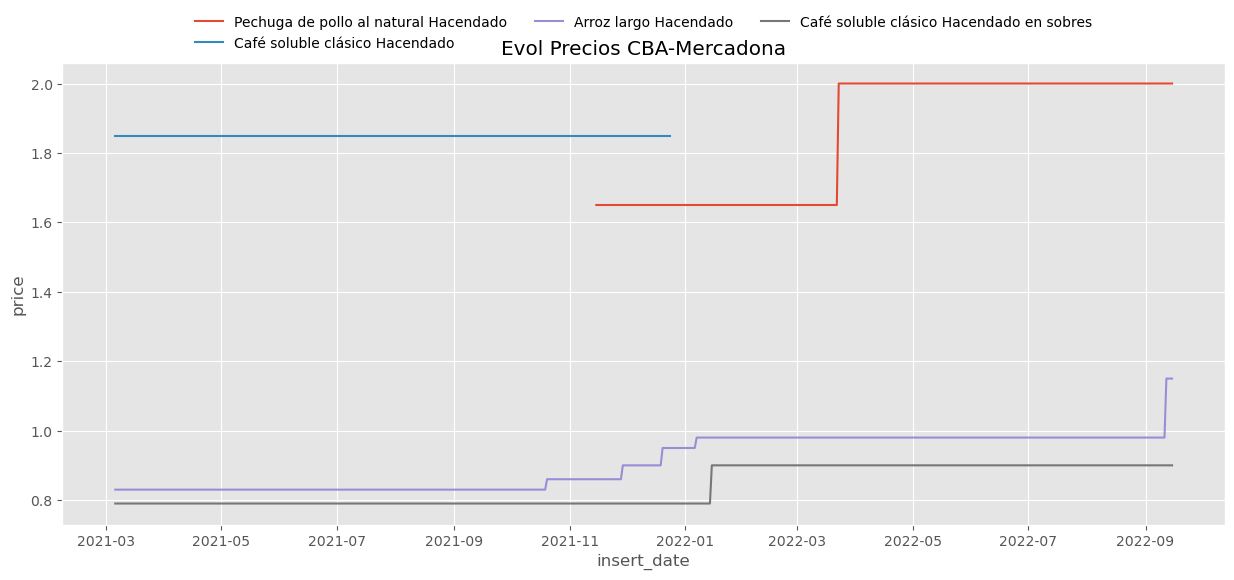

In [29]:
plt.figure(figsize=(15,6))
ax=sns.lineplot(data=cbamercadona, x="insert_date", y="price", hue="name")
plt.title('Evol Precios CBA-Mercadona')
sns.move_legend(ax, "lower center",bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,)

Al observar la evolución del precio del pollo, a comparación de los otros supermercados, no se vió afectado en forma directa por los efectos inflacionarios. Donde por el periodo analizado, sufrió un solo aumento y sigue manteniéndose más barato que la competencia.

En el caso del Arroz, en forma similar que Día y Carrefour, durante el 2021 mantuvo su valor por debajo de un euro. Sin embargo, durante el segundo semestre del 2022, vemos que sufre un aumento.

En cuanto al café,por un lado el soluble clásico, que si bien solo contamos con sus valores del 2021, no sufrió aumentos durante ese periodo, valiendo lo mismo que en Carrefour. Mientras que el café soluble en sobres, mantuvo su valor durante el 2021, sufriendo un aumento en el 2022.

### Categorías de productos perteneciente a propia marca de Mercadona

Podemos completar el análisis de precios al analizar cuáles son las principales categorías de cada marca blanca que, durante este periodo, se posicionan con mayor precio. 
Al trabajar con las tablas filtradas por valores únicos, para evitar registros repetidos, podemos ver las 5 principales categorías.

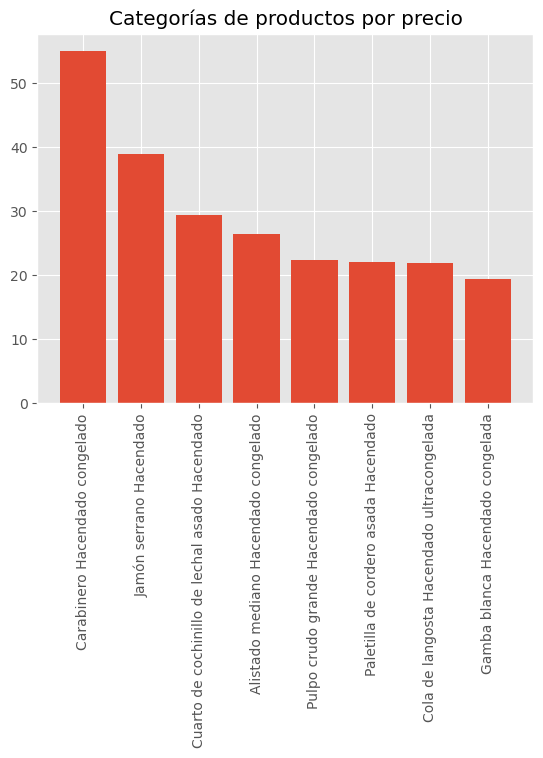

In [30]:
mercadona_categor = filtro_cat_m.groupby('name')['price'].median().sort_values(ascending=False).head(8)

plt.style.use('ggplot')
plt.bar(mercadona_categor.index, mercadona_categor)
plt.xticks(rotation=90)
plt.title('Categorías de productos por precio')
plt.show()

In [31]:
mercadona_categor = filtro_cat_m.groupby('name')['price'].median().sort_values(ascending=False).head(8)
mercadona_categor

name
Carabinero Hacendado congelado                   54.95
Jamón serrano Hacendado                          39.00
Cuarto de cochinillo de lechal asado Hacendado   29.40
Alistado mediano Hacendado congelado             26.50
Pulpo crudo grande Hacendado congelado           22.33
Paletilla de cordero asada Hacendado             22.13
Cola de langosta Hacendado ultracongelada        21.95
Gamba blanca Hacendado congelada                 19.45
Name: price, dtype: float64

## Desarrollo de precios para productos elegidos

Complementando la pregunta, podemos analizar la tendencia de los precios y su desarrollo para los productos elegidos que componen la CBA de cada marca blanca por supermercado.

### Día

Buscamos visualizar la evolución del precio de los productos durante el periodo 2021-2022 en un gráfico de dispersión, para ello:
* Ordenamos el dataframe que contiene la CBA de Día.
* Calculamos la **media** de los precios, agrupando por año, mes y producto.
* Reseteamos el índice para poder realizar el gráfico.

In [41]:
cbadia['year']= cbadia['insert_date'].map(lambda x: x.year)
cbadia['month']= cbadia['insert_date'].map(lambda x: x.month)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9268\1520772176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbadia['year']= cbadia['insert_date'].map(lambda x: x.year)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9268\1520772176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbadia['month']= cbadia['insert_date'].map(lambda x: x.month)


In [42]:
cbadia.groupby(["year","month","name"]).mean().price

year  month  name                                                                                  
2021  3      DIA arroz largo de 1ª categoría paquete 1 Kg                                              0.83
      4      DIA arroz largo de 1ª categoría paquete 1 Kg                                              0.83
      5      DIA arroz largo de 1ª categoría paquete 1 Kg                                              0.83
      6      DIA arroz largo de 1ª categoría paquete 1 Kg                                              0.83
      7      DIA arroz largo de 1ª categoría paquete 1 Kg                                              0.83
      8      DIA arroz largo de 1ª categoría paquete 1 Kg                                              0.83
      12     SELECCIÓN DE DIA pechuga de pollo entera formato familiar bandeja (peso aprox. 1.9 Kg)   11.38
2022  1      DIA CAFETERÍA café soluble clásico frasco 200 gr                                          2.35
             SELECCIÓN DE DIA pechug

In [43]:
df_dia = cbadia.groupby(["year","name"]).mean().reset_index()

### Carrefour

Buscamos visualizar la evolución del precio de los productos durante el periodo 2021-2022 en un gráfico de dispersión, para ello:
* Ordenamos el dataframe que contiene la CBA de Día.
* Calculamos la **media** de los precios, agrupando por año, mes y producto.
* Reseteamos el índice para poder realizar el gráfico.

In [44]:
cbacarrefour['year']= cbacarrefour['insert_date'].map(lambda x: x.year)
cbacarrefour['month']= cbacarrefour['insert_date'].map(lambda x: x.month)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9268\1293945257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbacarrefour['year']= cbacarrefour['insert_date'].map(lambda x: x.year)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9268\1293945257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbacarrefour['month']= cbacarrefour['insert_date'].map(lambda x: x.month)


In [45]:
cbacarrefour.groupby(["year","month","name"]).mean().price

year  month  name                                       
2021  3      Arroz largo categoría extra Carrefour 1 kg.   0.82
             Café soluble natural Carrefour 200 g.         1.85
             Pechuga de pollo Carrefour 1,2 kg aprox       6.17
      4      Arroz largo categoría extra Carrefour 1 kg.   0.82
             Café soluble natural Carrefour 200 g.         1.85
             Pechuga de pollo Carrefour 1,2 kg aprox       6.38
      5      Arroz largo categoría extra Carrefour 1 kg.   0.82
             Café soluble natural Carrefour 200 g.         1.85
             Pechuga de pollo Carrefour 1,2 kg aprox       6.42
      6      Arroz largo categoría extra Carrefour 1 kg.   0.82
             Café soluble natural Carrefour 200 g.         1.85
             Pechuga de pollo Carrefour 1,2 kg aprox       6.18
      7      Arroz largo categoría extra Carrefour 1 kg.   0.83
             Café soluble natural Carrefour 200 g.         1.85
             Pechuga de pollo Carrefour 1,2 kg 

In [46]:
df_carrefour = cbacarrefour.groupby(["year","name"]).mean().reset_index()

### Mercadona

Buscamos visualizar la evolución del precio de los productos durante el periodo 2021-2022 en un gráfico de dispersión, para ello:
* Ordenamos el dataframe que contiene la CBA de Mercadona.
* Calculamos la **media** de los precios, agrupando por año, mes y producto.
* Reseteamos el índice para poder realizar el gráfico.

In [47]:
cbamercadona['year']= cbamercadona['insert_date'].map(lambda x: x.year)
cbamercadona['month']= cbamercadona['insert_date'].map(lambda x: x.month)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9268\1047750603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbamercadona['year']= cbamercadona['insert_date'].map(lambda x: x.year)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9268\1047750603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbamercadona['month']= cbamercadona['insert_date'].map(lambda x: x.month)


In [48]:
cbamercadona.groupby(["year","month","name"]).mean().price

year  month  name                                    
2021  3      Arroz largo Hacendado                      0.83
             Café soluble clásico Hacendado             1.85
             Café soluble clásico Hacendado en sobres   0.79
      4      Arroz largo Hacendado                      0.83
             Café soluble clásico Hacendado             1.85
             Café soluble clásico Hacendado en sobres   0.79
      5      Arroz largo Hacendado                      0.83
             Café soluble clásico Hacendado             1.85
             Café soluble clásico Hacendado en sobres   0.79
      6      Arroz largo Hacendado                      0.83
             Café soluble clásico Hacendado             1.85
             Café soluble clásico Hacendado en sobres   0.79
      7      Arroz largo Hacendado                      0.83
             Café soluble clásico Hacendado             1.85
             Café soluble clásico Hacendado en sobres   0.79
      8      Arroz largo Hacend

In [49]:
df_mercadona = cbamercadona.groupby(["year","name"]).mean().reset_index()

### Buscamos comparar los productos seleccionados de la CBA a través de un subplot

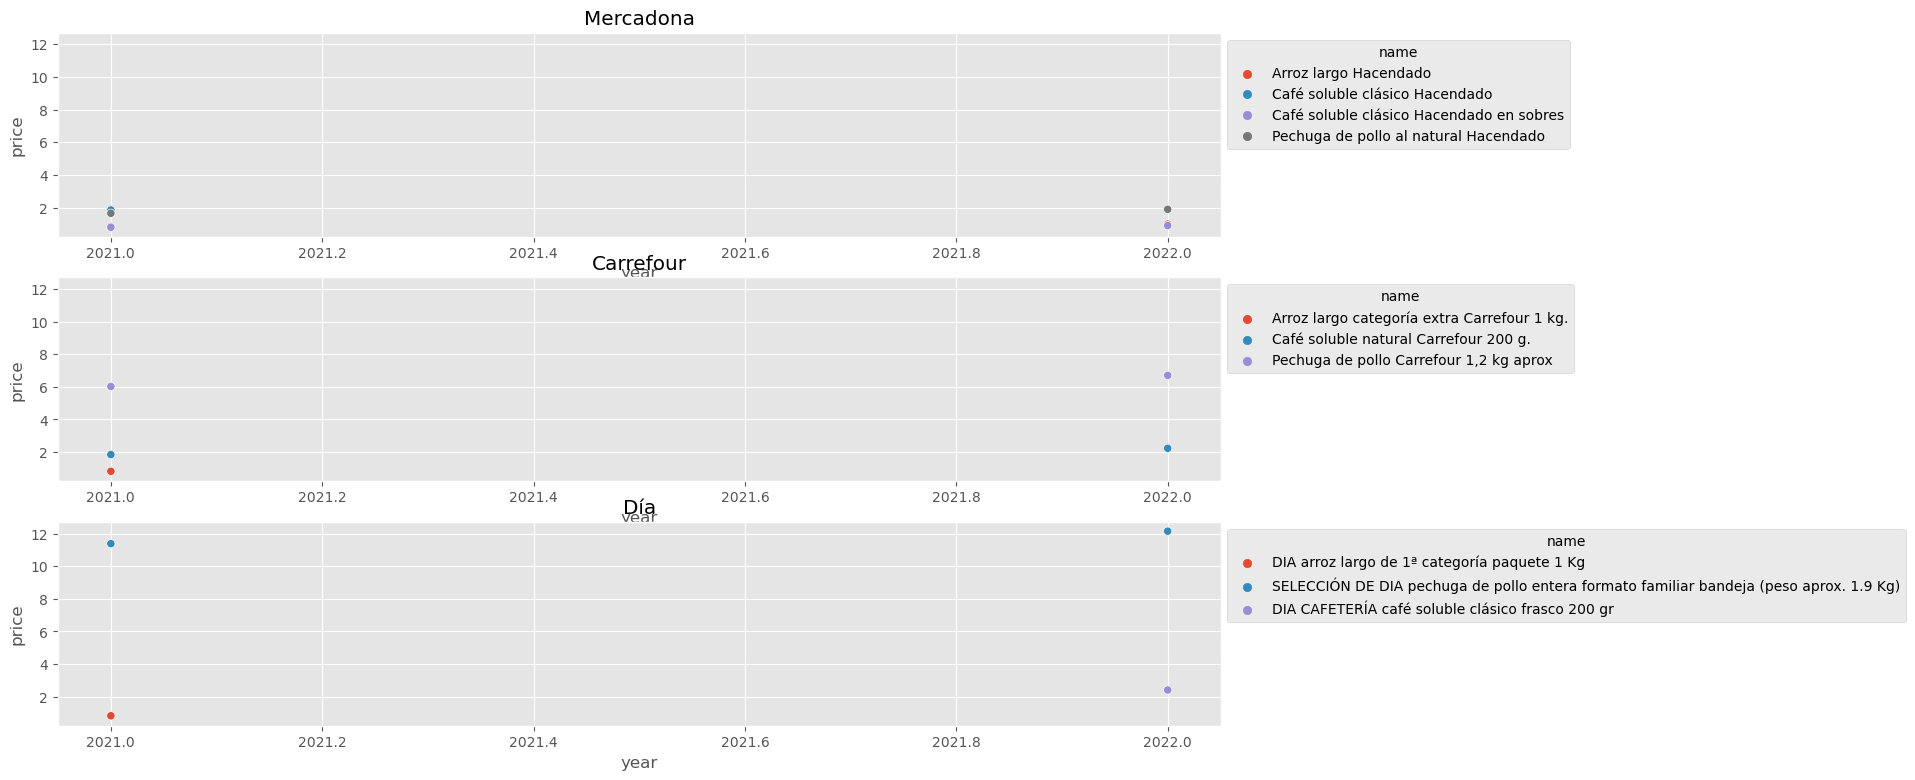

In [50]:
f, axs = plt.subplots(3,1,  #1 3
                      figsize=(15,9), #13 6
                      sharey=True)

m=sns.scatterplot(x = 'year', y = 'price', hue='name', data = df_mercadona,ax=axs[0])
m.set_title("Mercadona")#,y=1.12,fontsize=20,fontweight='bold')

c=sns.scatterplot(x = 'year', y = 'price', hue='name', data = df_carrefour, ax=axs[1])
c.set_title("Carrefour")

d=sns.scatterplot(x = 'year', y = 'price', hue='name', data = df_dia, ax=axs[2])
d.set_title("Día")

sns.move_legend(m, "upper left", bbox_to_anchor=(1,1))
sns.move_legend(c, "upper left", bbox_to_anchor=(1,1))
sns.move_legend(d, "upper left", bbox_to_anchor=(1,1))

## Conclusión

Del análisis por categoría, podemos encontrar que los productos con mayor precio en el caso de Dia se corresponden con el aceite de oliva, escalopines de salmón y pañales para bebé. En el caso de Carrefour, los relacionados con carnicería y charcutería son los que se destacan. La gran diferencia de precio entre el producto de marca blanca más caro de cada uno (€19.95 en el caso de Día y €149.90 en el caso de Carrefour), nos lleva a plantear el supuesto de que no son competidores directos del sector.

Mientras que por el lado de Mercadona, los productos englobados bajo sus propias marcas con mayor precio pertenecen a los mariscos congelados y charcutería. En este caso, podemos presuponer que existe una competencia más directa en esta última categoría con Carrefour, así sería una competencia por costo, ya que los precios de Carrefour son más del doble. 

El planteamiento del tipo de competencia, más el efecto inflacionario y los cambios de hábitos en el consumidor, pueden justificar que, si bien nuestros productos siguen una tendencia al alza, lo hacen en diferentes proporciones.

Sumándo a nuestro análisis, tanto Carrefour como Día tienen un ritmo alcista con los precios de sus marcas blancas. Si bien Mercadona, también está mostrando un aumento de precios, los mismos son significativamente menores en comparación con los otros supermercados. Si tomamos un producto como la pechuga de pollo, su aumento en el periodo entre dic/21 y mar/22 fue de 10 centavos de euro  (€1.65 a €1.75); en el caso de Carrefour el incremento fue de 0.43 ctvos. de euro en ese peiodo (€6.13 a €6.56),y en Día de 0.24 ctvos. de euro (€11.38 a €11.62).

Aunque sería necesario tomar más productos que compongan la CBA, a partir de estos resultados podemos proponer como otra hipótesis que, elegir comprar productos que integren la canasta básica alimentaria en Mercadona, es la opción más económica.
